In [2]:
# Necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Dataset
Data Description

The dataset consists of multiple columns, each representing different aspects of movies and their metadata. Below is a description of the key columns included in the dataset(excluding id):

	1- 	director_name: 			Name of the movie director.
	2-	num_critic_for_reviews: 	Number of critic reviews.
	3-	duration: 			Duration of the movie in minutes.
	4-	director_facebook_likes: 	Number of Facebook likes for the director.
	5-	actor_3_facebook_likes: 	Number of Facebook likes for the third listed actor.
	6-	actor_2_name: 			Name of the second listed actor.
	7-	actor_1_facebook_likes: 	Number of Facebook likes for the first listed actor.
	8-	gross: 				Gross earnings of the movie.
	9-	genres: 			Genres of the movie.
	10-	actor_1_name: 			Name of the first listed actor.
	11-	movie_title: 			Title of the movie.
	12-	num_voted_users: 		Number of users who voted for the movie.
	13-	cast_total_facebook_likes: 	Total number of Facebook likes for the entire cast.
	14-	actor_3_name: 			Name of the third listed actor.
	15-	facenumber_in_poster: 		Number of faces in the movie poster.
	16-	plot_keywords: 			Keywords describing the plot of the movie.
	17-	num_user_for_reviews: 		Number of user reviews.
	18-	language: 			Language of the movie.
	19-	country: 			Country where the movie was produced.
	20-	content_rating: 		Content rating of the movie.
	21-	title_year: 			Year the movie was released.
	22-	actor_2_facebook_likes: 	Number of Facebook likes for the second listed actor.
	23-	movie_facebook_likes: 		Number of Facebook likes for the movie.
	24-	title_embedding: 		Embedding vector for the movie title, generated using FastText.
	25-	average_degree_centrality:	A measure of centrality for the movie in the network of movies based on shared actors.

	26-	imdb_score_binned: (OUTPUT)	Binned IMDb score of the movie, used as the target variable for prediction.

In [3]:
df = pd.read_csv("project_data/train_dataset.csv")
df = df.drop('id', axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,Tony Nappo,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,Nicolas Cage,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,Wilford Brimley,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,Christopher Lee,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


## Data Cleaning

General Information of the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3004 non-null   object 
 1   num_critic_for_reviews     3004 non-null   int64  
 2   duration                   3004 non-null   int64  
 3   director_facebook_likes    3004 non-null   int64  
 4   actor_3_facebook_likes     3004 non-null   int64  
 5   actor_2_name               3004 non-null   object 
 6   actor_1_facebook_likes     3004 non-null   int64  
 7   gross                      3004 non-null   int64  
 8   genres                     3004 non-null   object 
 9   actor_1_name               3004 non-null   object 
 10  movie_title                3004 non-null   object 
 11  num_voted_users            3004 non-null   int64  
 12  cast_total_facebook_likes  3004 non-null   int64  
 13  actor_3_name               3004 non-null   objec

### Removing duplicates:

In [5]:
# Check for duplicates
print(f"Number of duplicates: {len(df) - len(df.drop_duplicates())}")
duplicate_data = df.loc[df.duplicated()]
duplicate_data.head()

Number of duplicates: 18


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
293,Stephen Frears,51,119,350,418,Peter Capaldi,18000,34700000,Drama|Romance,Keanu Reeves,...,143,English,USA,R,1988,17000,0,[-9.3630631e-05 1.1195319e-03 -4.3393980e-04 ...,0.003152,3
863,Joe Wright,256,111,456,394,Cara Delevingne,20000,34964818,Adventure|Family|Fantasy,Hugh Jackman,...,186,English,USA,PG,2015,548,24000,[-2.0044674e-03 -1.4716794e-03 -3.7672091e-04 ...,0.002251,2
873,Neil Burger,236,110,168,96,Eddie Marsan,3000,39825798,Drama|Mystery|Romance|Thriller,Rufus Sewell,...,645,English,USA,PG-13,2006,979,15000,[-0.00400639 0.00252517 0.00102413 0.002596...,0.001726,3
1237,Shawn Levy,69,88,189,799,Donald Faison,934,47811275,Adventure|Comedy|Family,Frankie Muniz,...,99,English,USA,PG,2002,927,896,[-1.1481880e-03 5.5078254e-04 1.4850105e-03 ...,0.002176,2
1676,Paul McGuigan,98,114,118,40,Christopher Cousins,489,12831121,Drama|Mystery|Romance|Thriller,Jessica Paré,...,298,English,USA,PG-13,2004,93,0,[-2.01291707e-03 1.83164096e-03 -1.78593531e-...,0.000600,2


In [6]:
cleaned_df = df.drop_duplicates()
cleaned_df = cleaned_df.reset_index(drop=True)

### Missing values

From the info above, no column has any missing values, however, there is None value in language.

In [7]:
cleaned_df['language'].value_counts()

English       2854
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Cantonese        5
Italian          5
Korean           4
Portuguese       4
Norwegian        3
Dutch            3
Danish           3
Hindi            3
Indonesian       2
Dari             2
Aboriginal       2
Persian          2
Thai             2
Bosnian          1
Maya             1
None             1
Filipino         1
Kazakh           1
Aramaic          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: language, dtype: int64

In [8]:
cleaned_df[cleaned_df['language'] == 'None']

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
2775,Ron Fricke,115,102,330,0,Balinese Tari Legong Dancers,48,2601847,Documentary|Music,Collin Alfredo St. Dic,...,69,None,USA,PG-13,2011,0,26000,[-1.7939140e-04 1.7596362e-03 -8.5148757e-05 ...,0.0003,4


In [9]:
# Count number of inf and Nan values
def count_infinite_nan_values_col(df):
    count = np.isinf(df).values.sum() 
    print("It contains " + str(count) + " infinite values") 
    
    count = df.isna().sum()  
    print("It contains " + str(count) + " NaN values") 
    

## Response Variable

The label indicates binned rating of the movies imdb rating binned (5 possible values, 0, 1,
2, 3, and 4). The distribution of y seems imbalanced as there are much more instances having a rating of 2.

In [10]:
y = cleaned_df['imdb_score_binned']
y.value_counts()

2    1830
3     770
1     234
4     128
0      24
Name: imdb_score_binned, dtype: int64

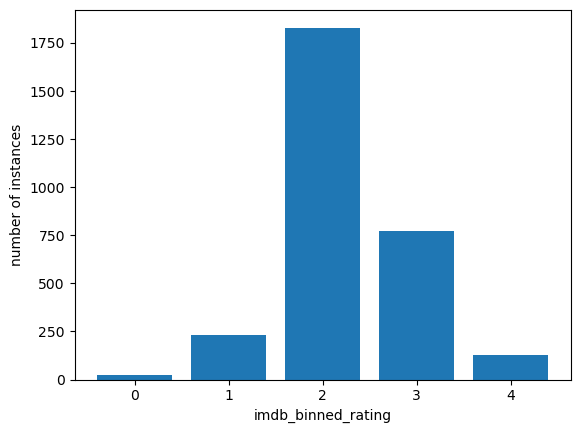

In [11]:
# Distribution of labels
from collections import Counter

counts = Counter(y)

plt.bar(counts.keys(), counts.values())
plt.xlabel("imdb_binned_rating")
plt.ylabel("number of instances")
plt.show()

## Exploratory Data Analysis


- **Categorical Features**: director name, actor, name, genres, movie_title, language, country, content_rating, actor_1_name, actor_2_name, actor_3_name

- **Numerical Features**: num_critic_for_reviews, duration, director_facebook_likes , actor_3_facebook_likes, actor_1_facebook_likes , gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews,title_year, average_degree_centrality, actor_2_facebook_likes, movie_facebook_likes

In [12]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,2986.0,1.653232e+02,1.213266e+02,2.0000,7.600000e+01,1.370000e+02,2.230000e+02,8.130000e+02
duration,2986.0,1.100978e+02,2.195190e+01,37.0000,9.600000e+01,1.060000e+02,1.200000e+02,3.300000e+02
director_facebook_likes,2986.0,7.786303e+02,2.993566e+03,0.0000,1.000000e+01,6.100000e+01,2.340000e+02,2.300000e+04
actor_3_facebook_likes,2986.0,7.643851e+02,1.895484e+03,0.0000,1.902500e+02,4.330000e+02,6.830000e+02,2.300000e+04
actor_1_facebook_likes,2986.0,7.647956e+03,1.652158e+04,0.0000,7.237500e+02,1.000000e+03,1.200000e+04,6.400000e+05
gross,2986.0,5.180370e+07,6.840125e+07,162.0000,8.453162e+06,3.008621e+07,6.646783e+07,6.586723e+08
num_voted_users,2986.0,1.046043e+05,1.508263e+05,91.0000,1.890375e+04,5.373650e+04,1.282162e+05,1.689764e+06
cast_total_facebook_likes,2986.0,1.136724e+04,2.005656e+04,0.0000,1.865000e+03,3.876000e+03,1.591350e+04,6.567300e+05
facenumber_in_poster,2986.0,1.381782e+00,2.095442e+00,0.0000,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
num_user_for_reviews,2986.0,3.351360e+02,4.151248e+02,4.0000,1.072500e+02,2.070000e+02,3.980000e+02,5.060000e+03


Let's exam continuous variables first:

### Numerical Variables

In [13]:
# Get the name of the columns
cont_cols =[]

for col in cleaned_df.columns:
    if cleaned_df[col].dtype != "object" and col != 'imdb_score_rating':
        cont_cols.append(col)
        
print(cont_cols)
print(len(cont_cols))

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'average_degree_centrality', 'imdb_score_binned']
15


<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>


- According to the graphs below, there are lots of outliers in the facebook_like attributes.

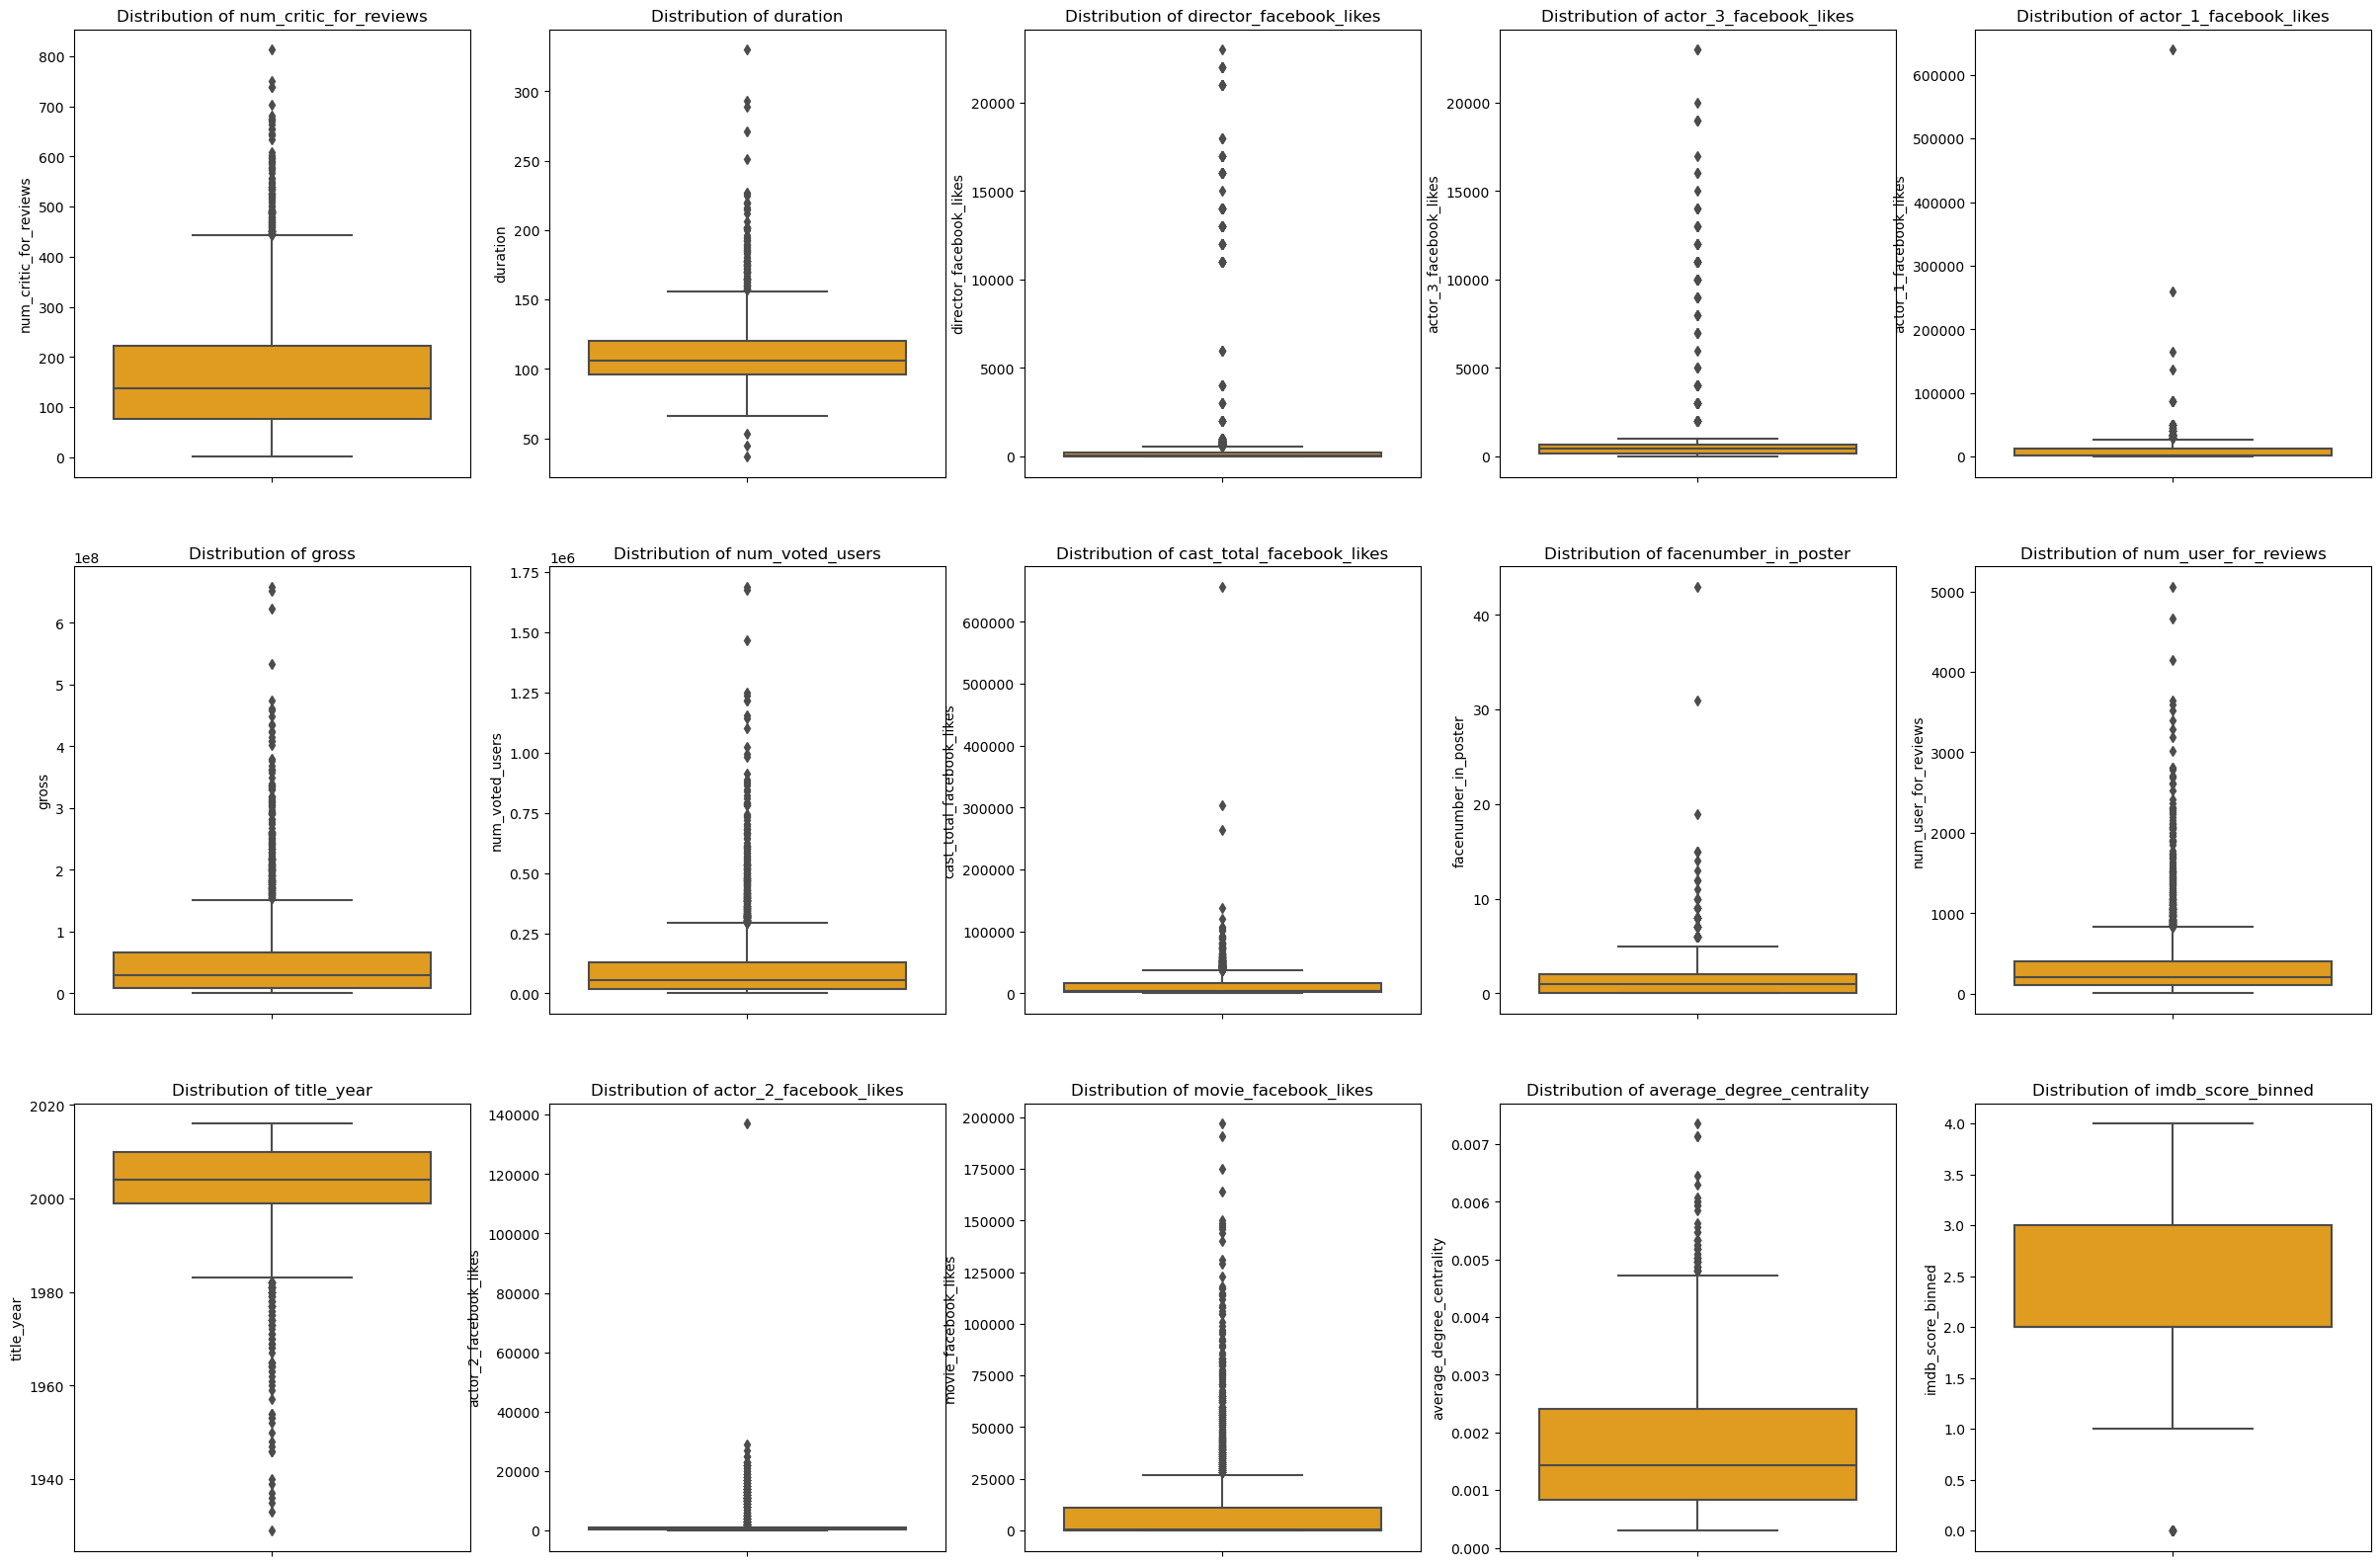

In [14]:
fig, axs = plt.subplots(3, 5, figsize=(30, 20))
    
axs_flat = axs.flatten()

for i, col in enumerate(cont_cols):
    sns.boxplot(y=cleaned_df[col], color="orange", ax=axs_flat[i]).set(title=f"Distribution of {col}")

**a. facebook_likes attributes**

In [15]:
like_attributes = ['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'actor_2_facebook_likes', 'movie_facebook_likes']

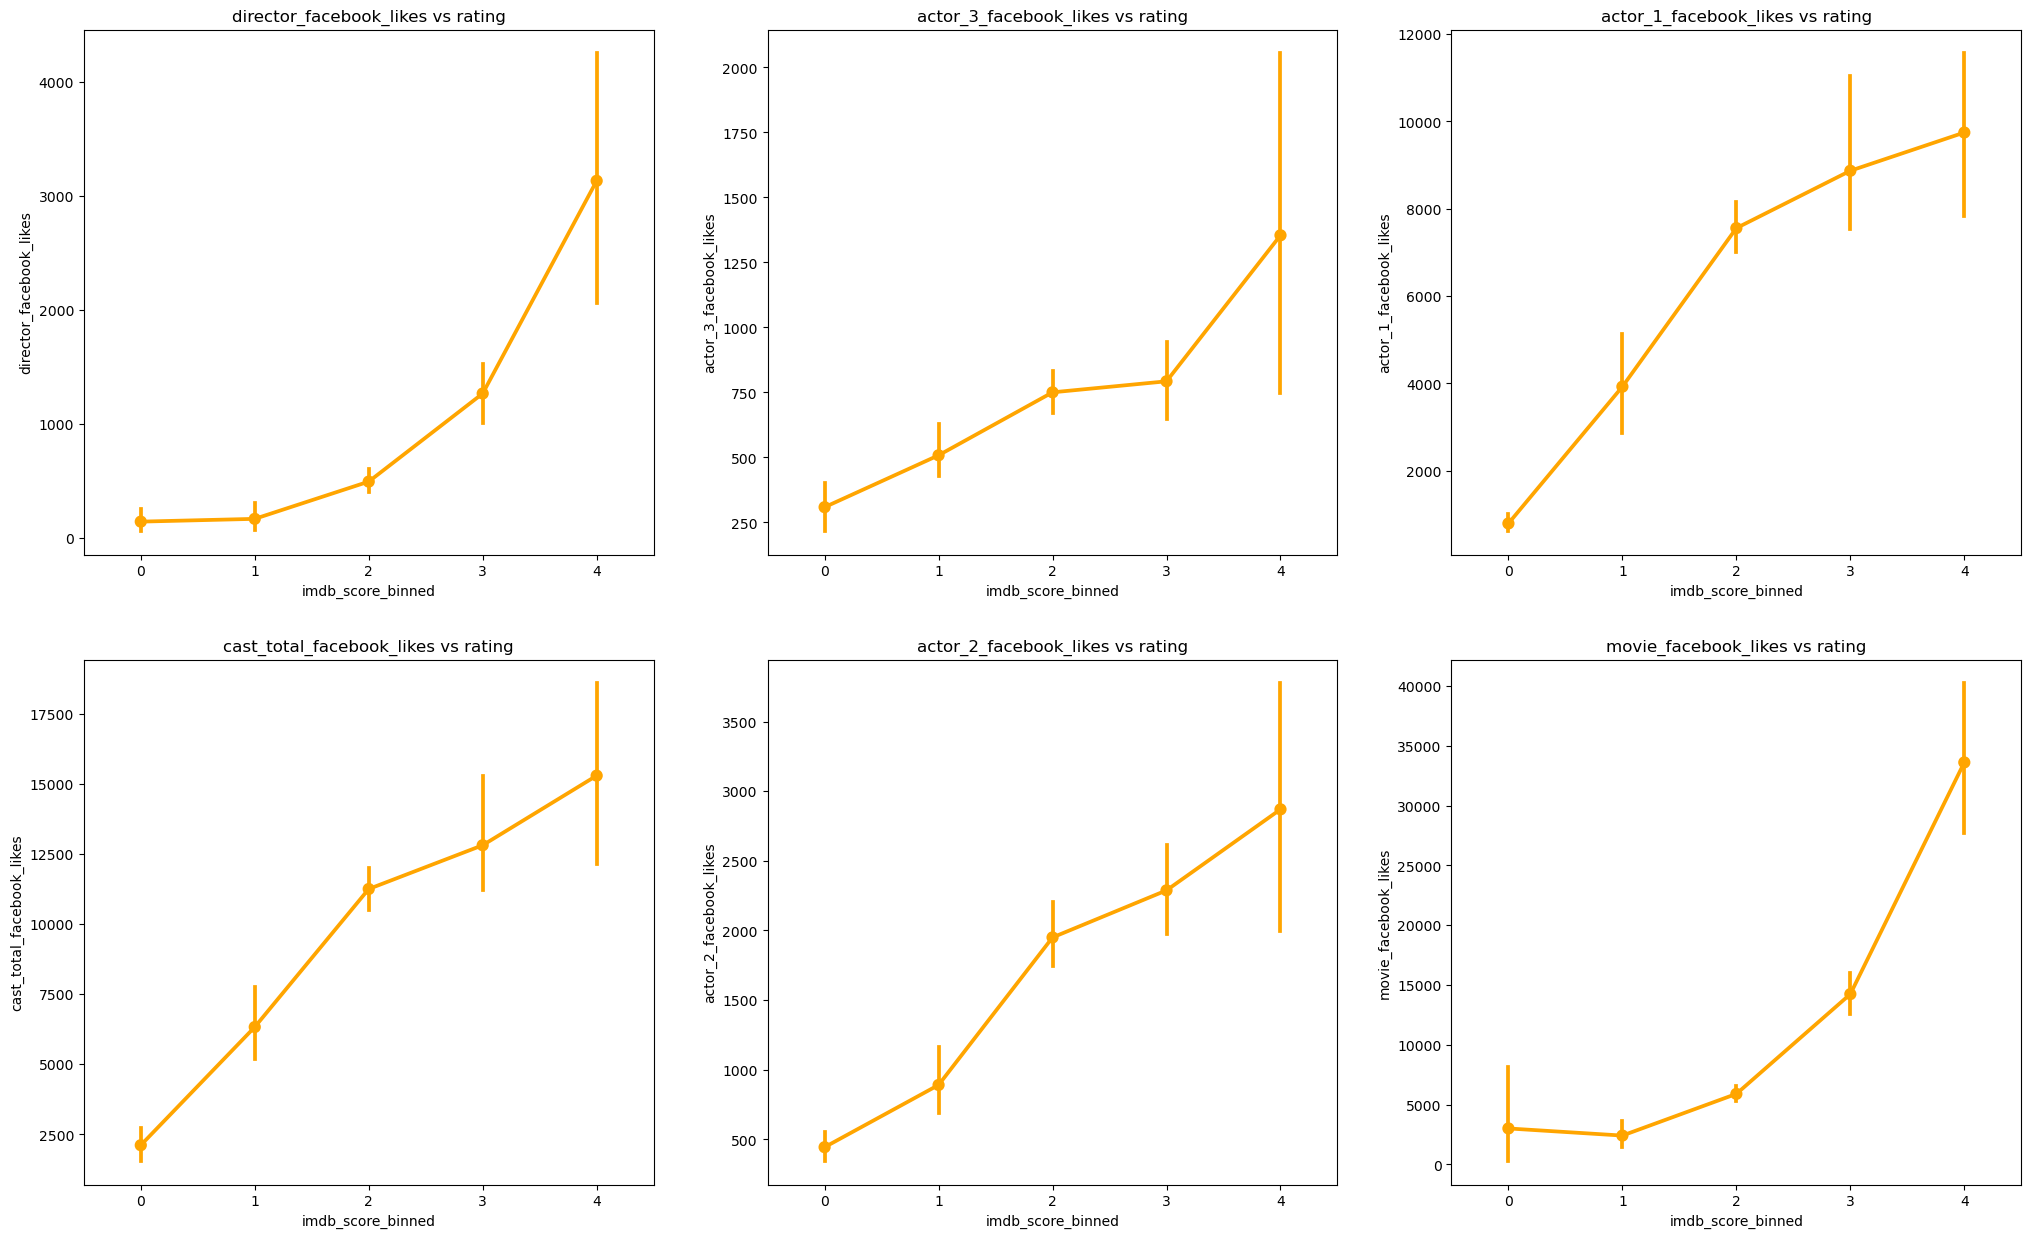

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    
axs_flat = axs.flatten()

for i, like_attribute in enumerate(like_attributes):
    sns.pointplot(x=y, y=cleaned_df[like_attribute], color="orange", ax=axs_flat[i]).set(title=f"{like_attribute} vs rating")

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>


- It is quite clear that the trends in actor_2_facebook_likes and actor_1_facebook_likes and cast_total_facebook_likes are quite similar. They may be highly correlated to each other. 

**b. num_\* attributes**

I will look at there attributes: ['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews']


In [17]:
num_user_attributes = ['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews']

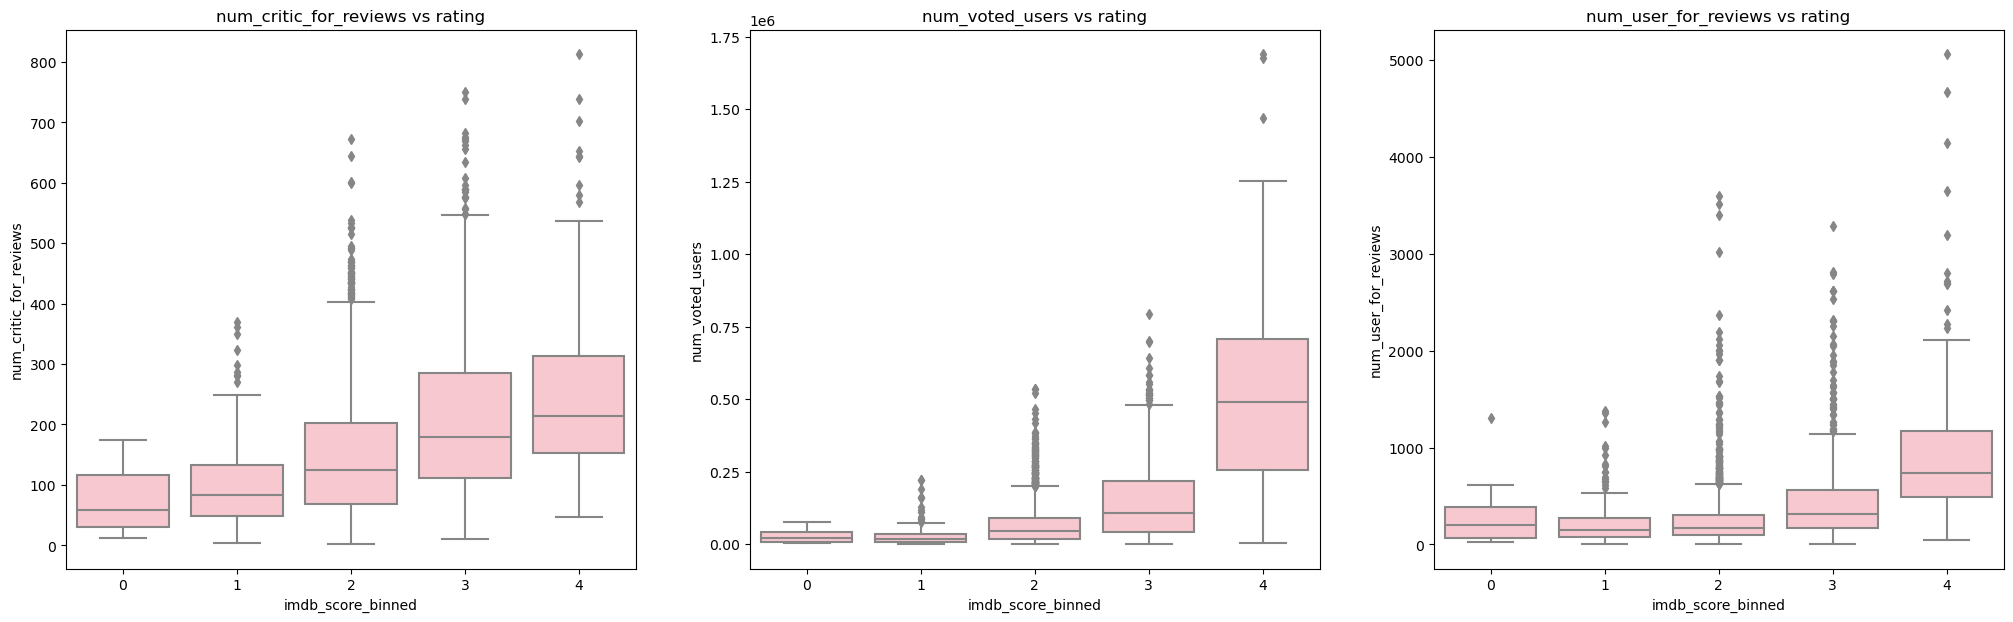

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
    
axs_flat = axs.flatten()

for i, col in enumerate(num_user_attributes):
    sns.boxplot(x=y, y=cleaned_df[col], color="pink", ax=axs_flat[i]).set(title=f"{col} vs rating")


<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- They may be quite relevant to the imdb rating.

**c. title_year**

- It seems that most films in this dataset were released after 1980.

[Text(0.5, 1.0, 'Distribution of title years')]

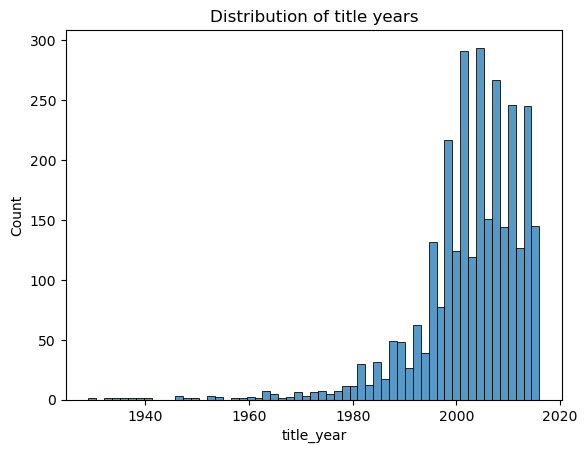

In [19]:
sns.histplot(cleaned_df["title_year"]).set(title=f"Distribution of title years")

**d. gross**
- gross might have a high correlation with the imdb rating.

<Axes: xlabel='imdb_score_binned', ylabel='gross'>

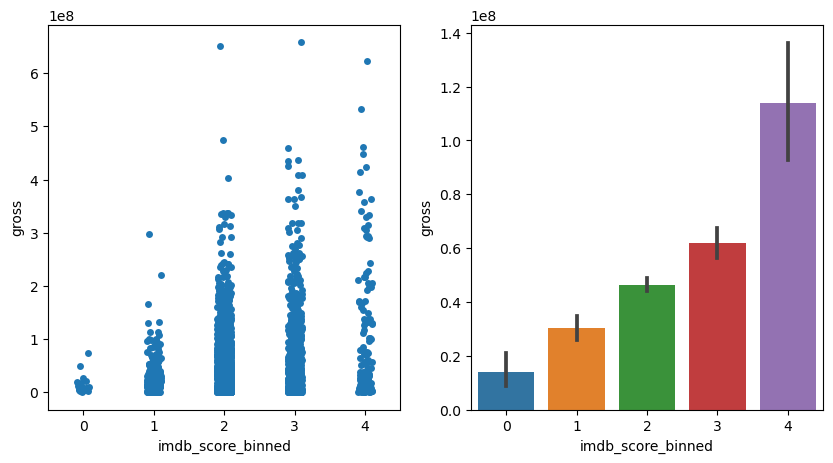

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.stripplot(x = y, y=cleaned_df['gross'], ax=axs[0])
sns.barplot(x = y, y=cleaned_df['gross'], ax=axs[1])

**e. duration, facenumber_in_poster, average_degree_centrality**

- facenumber_in_poster might have the insignificant impact on the rating.

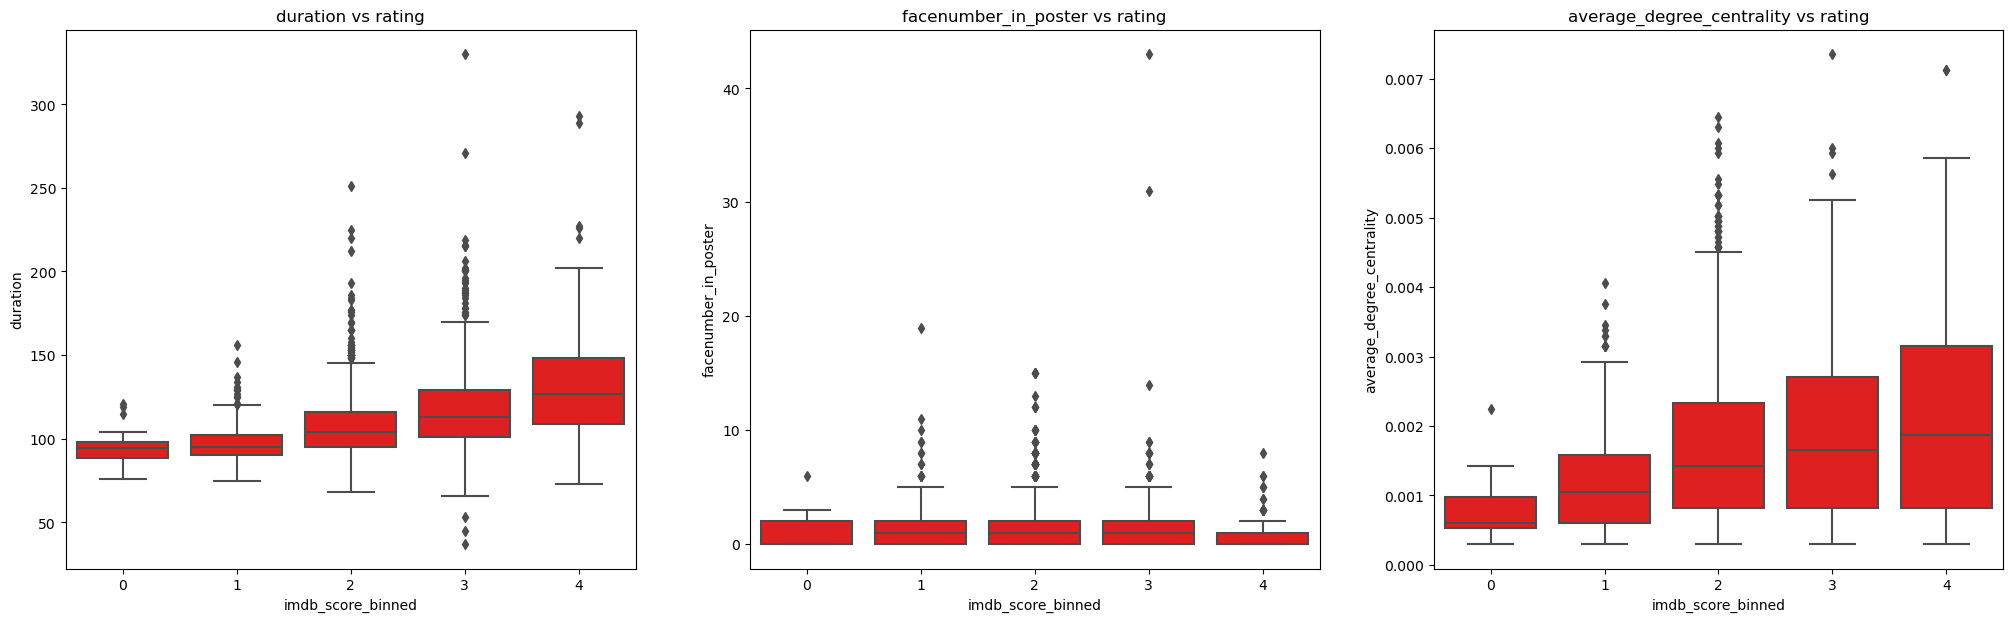

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
    
axs_flat = axs.flatten()

for i, col in enumerate(["duration", "facenumber_in_poster", "average_degree_centrality"]):
    sns.boxplot(x=y, y=cleaned_df[col], color="red", ax=axs_flat[i]).set(title=f"{col} vs rating")

### Categorical Variables

In [22]:
# Get the name of the columns
cate_cols =[]

for col in cleaned_df.columns:
    if cleaned_df[col].dtype == "object":
        cate_cols.append(col)
        
print(cate_cols)

['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding']


**a. Name attributes**

- Most of the values of each attribute are distinct.

In [23]:
cleaned_df['director_name'].value_counts()

Steven Spielberg        21
Clint Eastwood          15
Woody Allen             15
Tim Burton              14
Steven Soderbergh       14
                        ..
Terence Davies           1
Phyllida Lloyd           1
Joseph L. Mankiewicz     1
Alan Cohn                1
Eugenio Derbez           1
Name: director_name, Length: 1460, dtype: int64

In [24]:
cleaned_df['actor_2_name'].value_counts()

Morgan Freeman        15
Charlize Theron       12
Judy Greer             9
Thomas Kretschmann     8
Scott Glenn            8
                      ..
Whitney Able           1
Dirk Bogarde           1
Ashraf Barhom          1
Jonny Weston           1
Jessica Lindsey        1
Name: actor_2_name, Length: 1903, dtype: int64

In [25]:
cleaned_df['actor_1_name'].value_counts()

Johnny Depp       30
Robert De Niro    28
Harrison Ford     24
J.K. Simmons      23
Nicolas Cage      23
                  ..
Andy Dick          1
Kevin Nash         1
Ted Danson         1
Chase Ellison      1
Eugenio Derbez     1
Name: actor_1_name, Length: 1265, dtype: int64

In [26]:
cleaned_df['actor_3_name'].value_counts()

Steve Coogan         7
Robert Duvall        7
Ben Mendelsohn       6
Craig T. Nelson      5
Larry Miller         5
                    ..
Matt Schulze         1
Lex Shrapnel         1
Albert Salmi         1
Bonnie Somerville    1
Hugo Stiglitz        1
Name: actor_3_name, Length: 2198, dtype: int64

In [27]:
count_actor = cleaned_df['actor_1_name'].value_counts().add(cleaned_df['actor_3_name'].value_counts(), fill_value=0).add(cleaned_df['actor_2_name'].value_counts(), fill_value=0).sort_values(ascending=False)

count_actor

Morgan Freeman       35.0
Robert De Niro       33.0
Bruce Willis         30.0
Johnny Depp          30.0
Matt Damon           29.0
                     ... 
Leslie Caron          1.0
Leslie Hope           1.0
Leslie Jordan         1.0
Leticia Brédice       1.0
Mihalis Giannatos     1.0
Length: 3859, dtype: float64

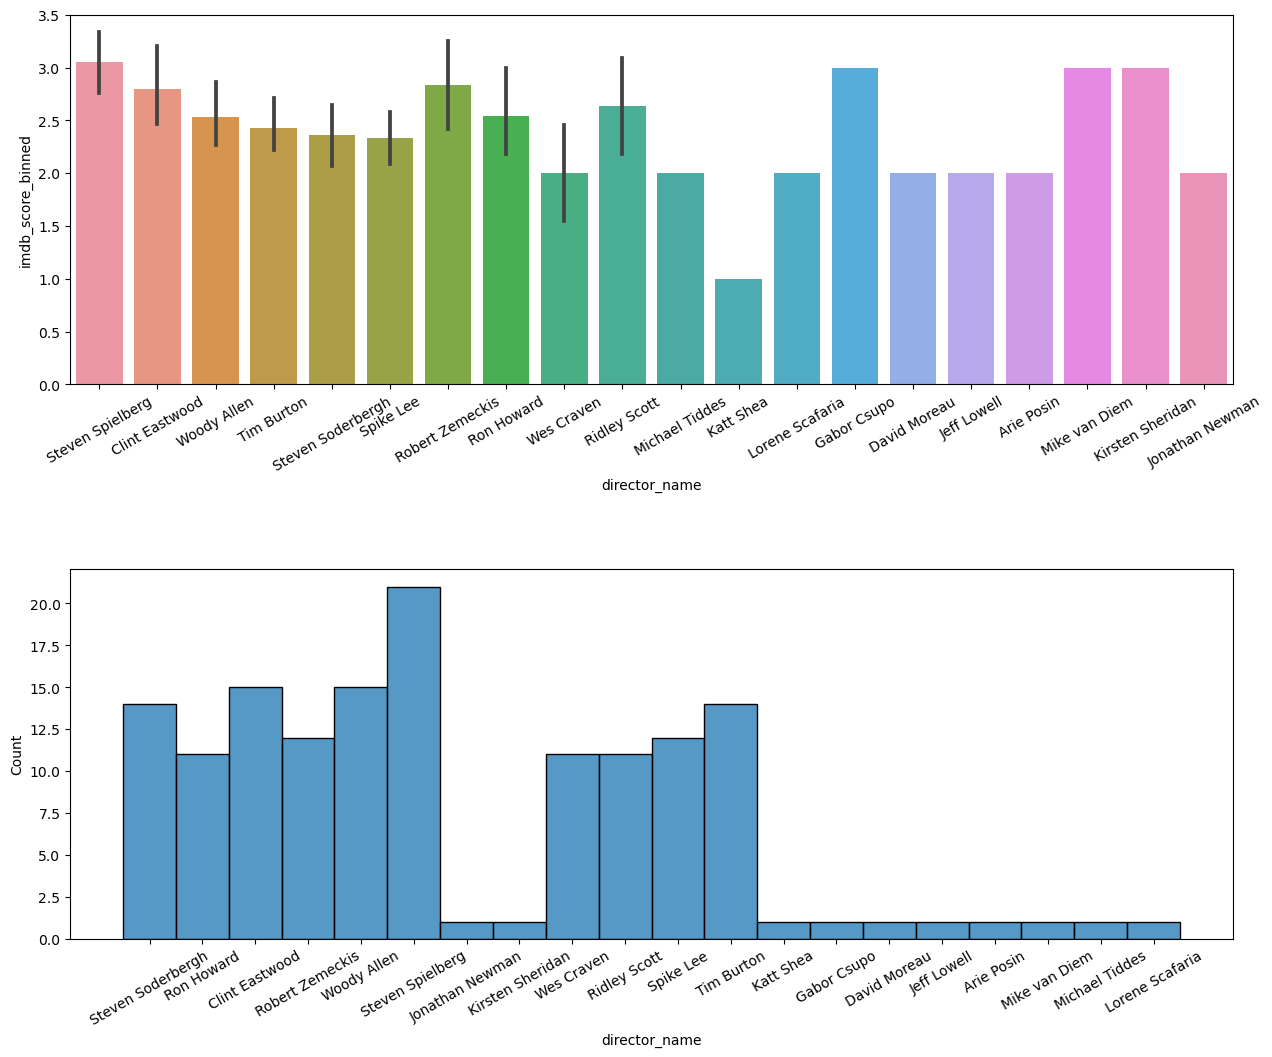

In [28]:
# Plot the  10 and the bottom 10 frequent director names

top_10_directors = cleaned_df['director_name'].value_counts().nlargest(10).index
bottom_10_directors = cleaned_df['director_name'].value_counts().nsmallest(10).index

# Combine top and bottom directors
selected_directors = list(top_10_directors) + list(bottom_10_directors)
selected_data = cleaned_df[cleaned_df['director_name'].isin(selected_directors)]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 12))
sns.barplot(data=selected_data, x="director_name", y=y, order=selected_directors, ax=axs[0])
sns.histplot(data=selected_data, x="director_name", ax=axs[1], discrete=True)

plt.subplots_adjust(hspace=0.5)
axs[0].tick_params(axis='x', rotation=30)
axs[1].tick_params(axis='x', rotation=30)

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- It seems that the the rating accross all director_name is not so different.

Text(0, 0.5, 'Average IMDb Rating')

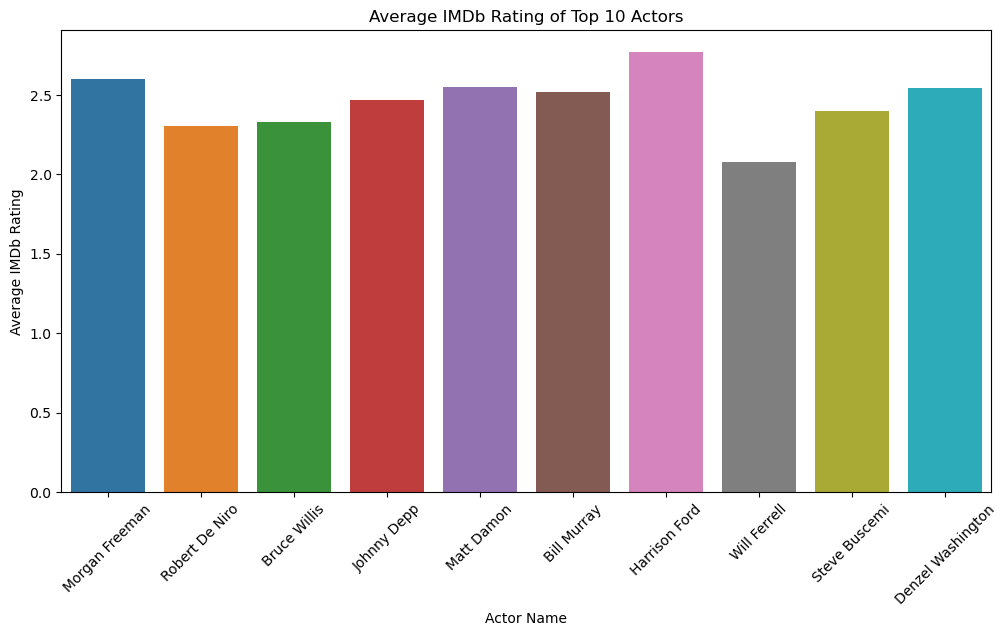

In [29]:
# Select top 10 actors
top_10_actors = count_actor.nlargest(10).index

# Filter data for top 10 actors
selected_data_actors = cleaned_df[cleaned_df[['actor_1_name', 'actor_2_name', 'actor_3_name']].isin(top_10_actors).any(axis=1)]

# Calculate average rating for each actor
average_ratings = {}
for actor in top_10_actors:
    actor_data = selected_data_actors[selected_data_actors[['actor_1_name', 'actor_2_name', 'actor_3_name']].eq(actor).any(axis=1)]
    average_rating = actor_data['imdb_score_binned'].mean()
    average_ratings[actor] = average_rating

# Create a bar plot for average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=list(average_ratings.keys()), y=list(average_ratings.values()), order=top_10_actors)
plt.xticks(rotation=45)  
plt.title('Average IMDb Rating of Top 10 Actors')
plt.xlabel('Actor Name')
plt.ylabel('Average IMDb Rating')

Text(0, 0.5, 'Average IMDb Rating')

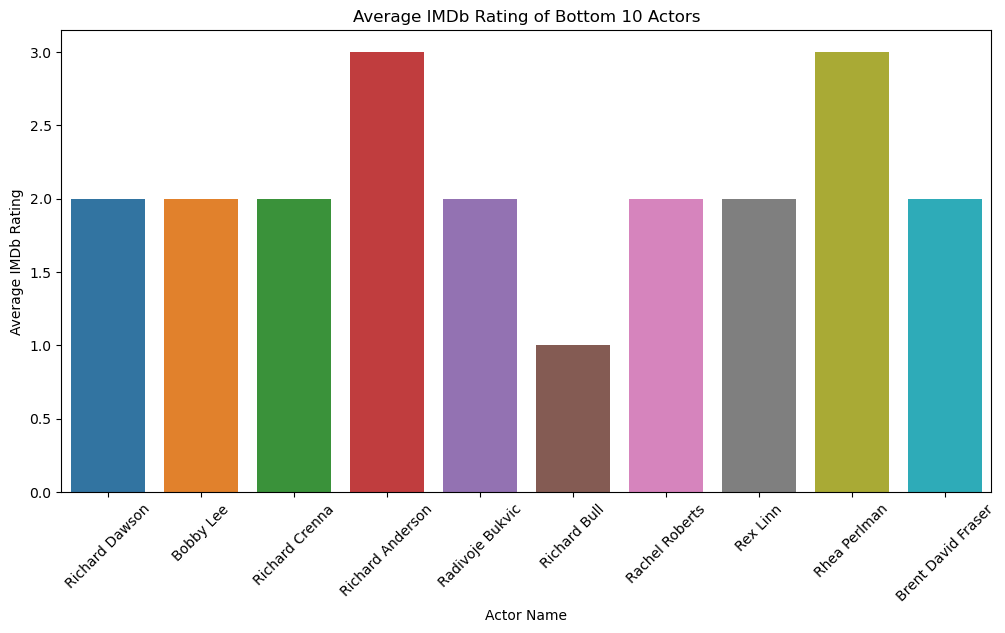

In [30]:
# Select top 10 actors
bottom_10_actors = count_actor.nsmallest(10).index

# Filter data for top 10 actors
selected_data_actors = cleaned_df[cleaned_df[['actor_1_name', 'actor_2_name', 'actor_3_name']].isin(bottom_10_actors).any(axis=1)]

# Calculate average rating for each actor
average_ratings = {}
for actor in bottom_10_actors:
    actor_data = selected_data_actors[selected_data_actors[['actor_1_name', 'actor_2_name', 'actor_3_name']].eq(actor).any(axis=1)]
    average_rating = actor_data['imdb_score_binned'].mean()
    average_ratings[actor] = average_rating

# Create a bar plot for average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=list(average_ratings.keys()), y=list(average_ratings.values()), order=bottom_10_actors)
plt.xticks(rotation=45)  
plt.title('Average IMDb Rating of Bottom 10 Actors')
plt.xlabel('Actor Name')
plt.ylabel('Average IMDb Rating')

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- It seems that the average ratings of top 10 actors is higher than those of bottom 10 actors.



Let's look at the preprocessed data using CountVectorizer.

In [31]:
dup_index = duplicate_data.index
dup_index

Int64Index([ 293,  863,  873, 1237, 1676, 1680, 1953, 2027, 2180, 2339, 2517,
            2524, 2789, 2821, 2823, 2878, 2889, 2895],
           dtype='int64')

In [32]:
train_countvec_features_director_name = np.load('project_data/features_countvec/train_countvec_features_director_name.npy')
print(np.shape(train_countvec_features_director_name))

(3004, 2113)


It seems the each row of the array represets an instance and each column represents each word of the name.

In [33]:
# Drop cols
train_countvec_features_director_name = np.delete(train_countvec_features_director_name, dup_index, axis=0)
print(np.shape(train_countvec_features_director_name))

(2986, 2113)


In [34]:
train_countvec_features_actor_1_name = np.load('project_data/features_countvec/train_countvec_features_actor_1_name.npy')
print(np.shape(train_countvec_features_actor_1_name))

train_countvec_features_actor_1_name = np.delete(train_countvec_features_actor_1_name, dup_index, axis=0)
print(np.shape(train_countvec_features_actor_1_name))

(3004, 2063)
(2986, 2063)


In [35]:
train_countvec_features_actor_2_name = np.load('project_data/features_countvec/train_countvec_features_actor_2_name.npy')
train_countvec_features_actor_2_name = np.delete(train_countvec_features_actor_2_name, dup_index, axis=0)
print(np.shape(train_countvec_features_actor_2_name))

(2986, 2919)


Let's do the same for actor_3_name.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

actor_3_name = cleaned_df['actor_3_name']
vectorizer = CountVectorizer()
actor_3_count = vectorizer.fit_transform(actor_3_name)
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

actor_3_count_array = actor_3_count.toarray()
print(np.shape(actor_3_count.toarray()))

['aaliyah' 'aaron' 'aasif' ... 'ángel' 'óscar' 'ølgaard']
2911
(2986, 2911)


**b. movie_title and title_embedding**

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

Most of the values are distinct; there are very few repetitions. Movie titles can be repetitive due to reasons such as having the same title or being a remake version.

In [37]:
cleaned_df['movie_title'].value_counts()

King Kong                     3
The Great Gatsby              2
Jack Reacher                  2
Mercury Rising                2
Carrie                        2
                             ..
Kiss the Bride                1
Star Trek                     1
Mean Creek                    1
Blade Runner                  1
Instructions Not Included     1
Name: movie_title, Length: 2942, dtype: int64

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

Embedding vector for the movie title, generated using FastText. The first element has the value count of 3 which matches the King Kong.

- The length of the vector (e.g., 100 in your case) represents the dimensionality of the embedding space. This dimensionality is a hyperparameter that is set when training the FastText model.
- Each value in the vector is a floating-point number that represents the position of that movie title in the high-dimensional embedding space.
- The values in the vector capture the semantic and syntactic characteristics of the entire movie title, not individual words.
- Similar movie titles should have similar vector representations (i.e., the vectors will be close in the embedding space), reflecting their semantic similarity.

**c. genres and plot_keywords**

In [38]:
cleaned_df['genres'].value_counts()

Comedy|Drama|Romance                                      122
Comedy|Drama                                              111
Drama                                                     107
Comedy|Romance                                            107
Comedy                                                    104
                                                         ... 
Adventure|Comedy|Romance                                    1
Action|Crime|Sport|Thriller                                 1
Adventure|Comedy|Family|Fantasy|Music|Sci-Fi                1
Adventure|Animation|Comedy|Drama|Family|Fantasy|Sci-Fi      1
Documentary|Drama|War                                       1
Name: genres, Length: 675, dtype: int64

In [39]:
dict_genres = {}

for value in cleaned_df['genres']:
    genres = value.split("|")
    for genre in genres:
        dict_genres[genre] = dict_genres.get(genre, 0) + 1
        
len(dict_genres.values())

22

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

There are only 22 distinct genres, however, there are 100 columns in the provided NPY file. Therefore, it might be the case that the 100 values in each row represent the embedding vector for the specific combination of genres for that movie instead of each genre.

In [40]:
genres_np = np.load('project_data/features_doc2vec/train_doc2vec_features_genre.npy')
genres_np = np.delete(genres_np, dup_index, axis=0)
np.shape(genres_np)

(2986, 100)

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- There are many genres with a fair distribution in the dataset.
- Drama and Comedy are the most dominate genres.


In [41]:
dict_genres_rating = {}

for i in cleaned_df.index:
    genres = cleaned_df.loc[i, 'genres'].split("|")
    for genre in genres:
        dict_genres_rating[genre] = dict_genres_rating.get(genre, 0) + cleaned_df.loc[i, 'imdb_score_binned']
        
for key, value in dict_genres_rating.items():
    dict_genres_rating[key] = round(dict_genres_rating[key] / dict_genres[key], 2)

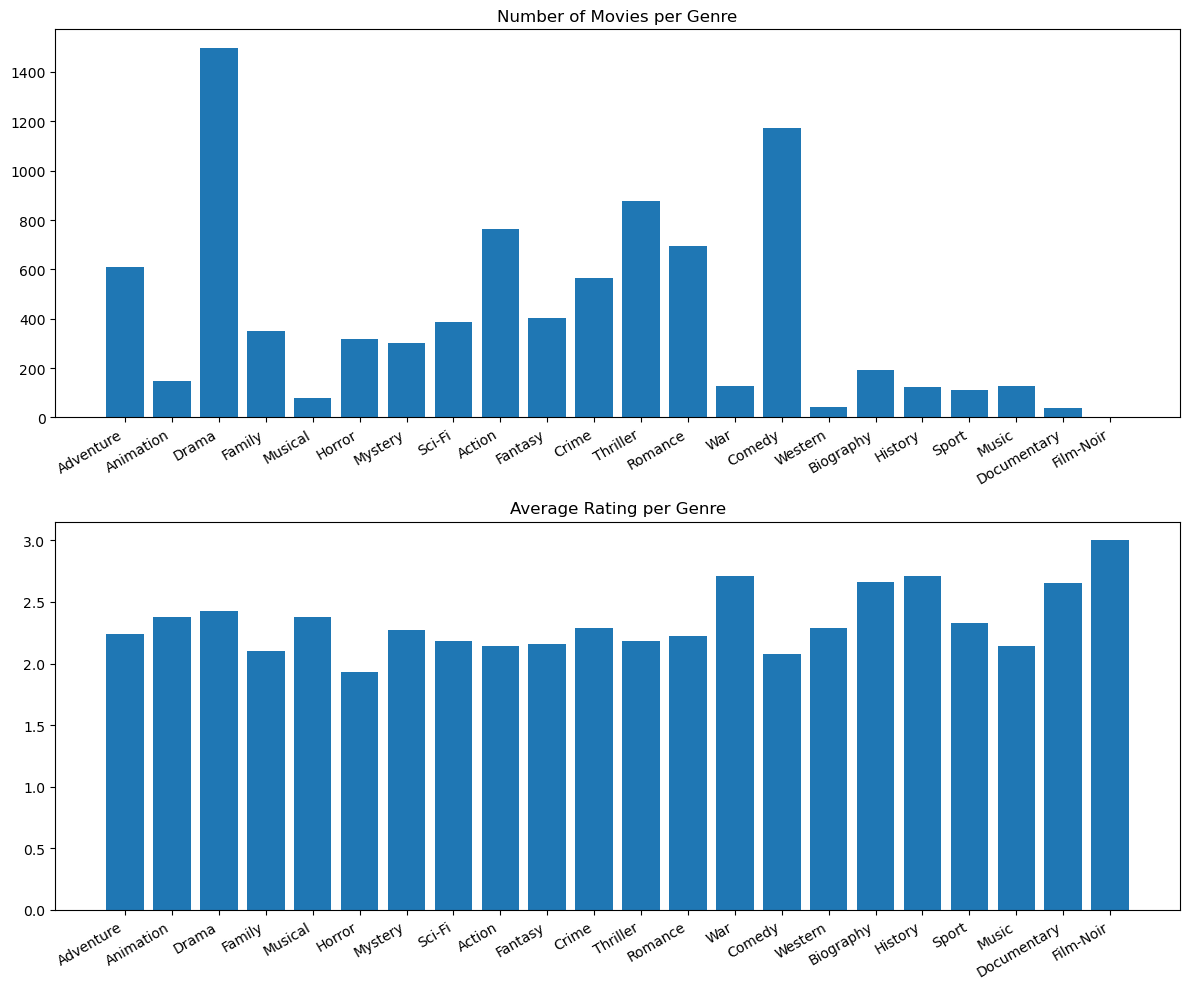

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the Number of Movies per Genre
axs[0].bar(range(len(dict_genres)), dict_genres.values(), tick_label=list(dict_genres.keys()))
axs[0].set_title('Number of Movies per Genre')

# Plotting the Average Rating per Genre
axs[1].bar(range(len(dict_genres_rating)), dict_genres_rating.values(), tick_label=list(dict_genres_rating.keys()))
axs[1].set_title('Average Rating per Genre')

plt.subplots_adjust(hspace=0.5)

# Setting xticks for both subplots
for ax in axs:
    ax.set_xticks(range(len(dict_genres)))
    ax.set_xticklabels(dict_genres.keys(), rotation=30, ha='right')

plt.tight_layout()
plt.show()


<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- The rating seems to slightly fluctuate across genres.

In [43]:
dict_keywords = {}

for value in cleaned_df['plot_keywords']:
    keywords = value.split("|")
    for word in keywords:
        dict_keywords[word] = dict_keywords.get(word, 0) + 1


dict_keywords_rating = {}

for i in cleaned_df.index:
    keywords = cleaned_df.loc[i, 'plot_keywords'].split("|")
    for word in keywords:
        dict_keywords_rating[word] = dict_keywords_rating.get(word, 0) + cleaned_df.loc[i, 'imdb_score_binned']
        
for key, value in dict_keywords_rating.items():
    dict_keywords_rating[key] = round(dict_keywords_rating[key] / dict_keywords[key], 2)
    
dict_keywords = dict(sorted(dict_keywords.items(), key=lambda x: x[1], reverse=True))

top_10_keywords = list(dict_keywords.keys())[:10]

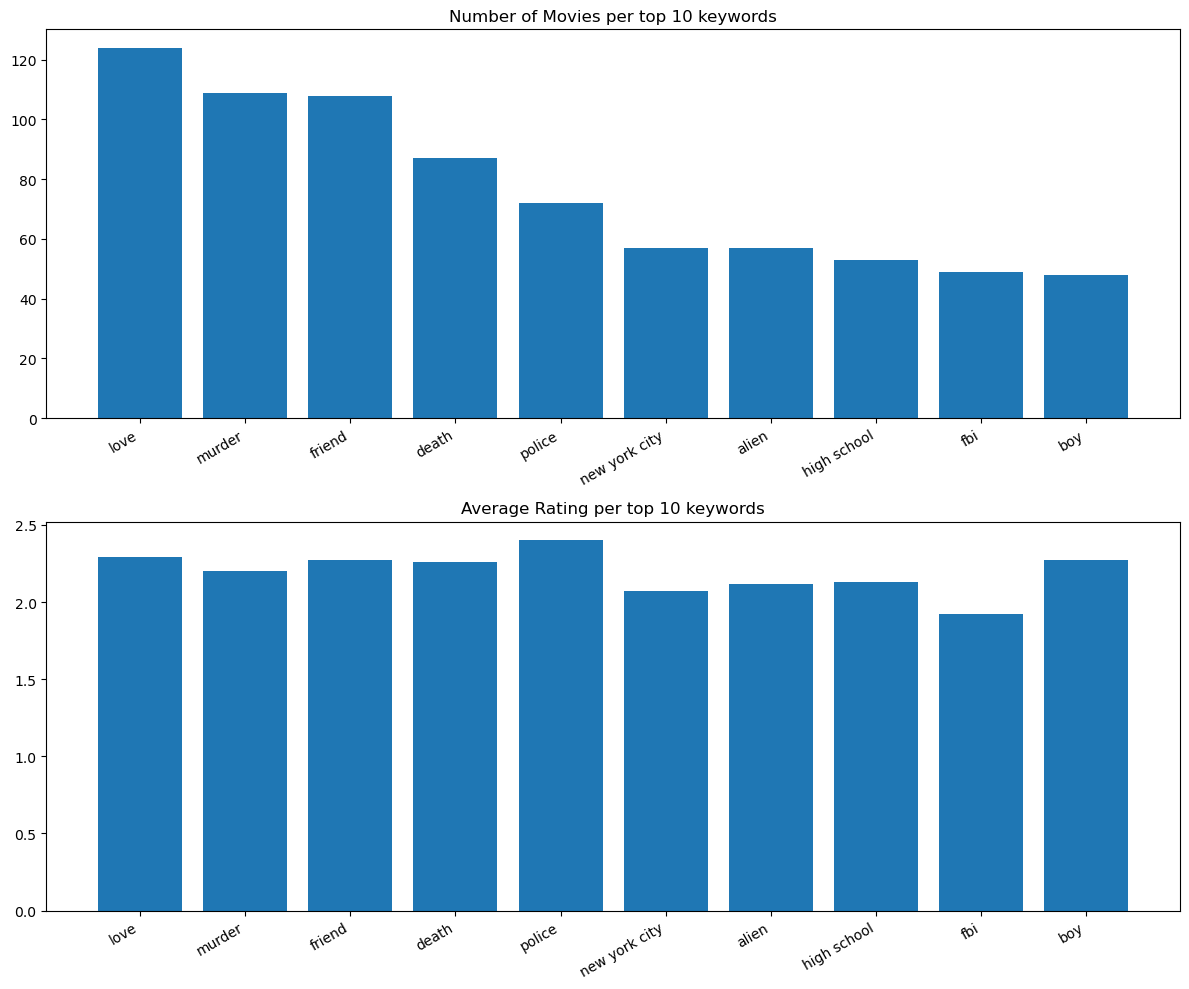

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the Number of Movies per keyword
axs[0].bar(range(10), list(dict_keywords.values())[:10], tick_label=top_10_keywords)
axs[0].set_title('Number of Movies per top 10 keywords')

# Plotting the Average Rating per keyword
axs[1].bar(range(10), [dict_keywords_rating[key] for key in top_10_keywords], tick_label=top_10_keywords)
axs[1].set_title('Average Rating per top 10 keywords')

plt.subplots_adjust(hspace=0.5)

# Setting xticks for both subplots
for ax in axs:
    ax.set_xticks(range(10))
    ax.set_xticklabels(top_10_keywords, rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [45]:
plotkeywords_np = np.load('project_data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')
plotkeywords_np = np.delete(plotkeywords_np, dup_index, axis=0)
np.shape(plotkeywords_np)

(2986, 100)

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- The rating seems to be stable across keywords.

**d. language, country, content rating**

Number of country:
 USA               2367
UK                 253
France              86
Germany             60
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: country,

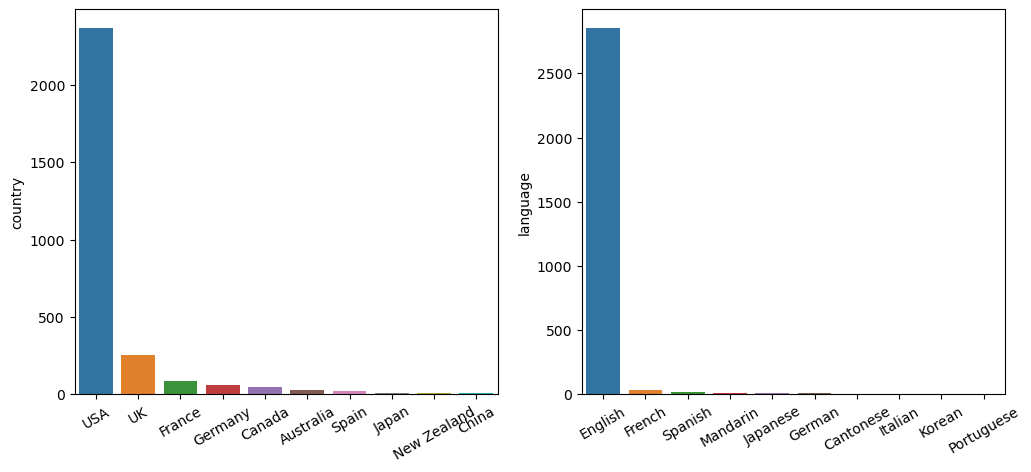

In [46]:
# Top 10 country
print("Number of country:\n", cleaned_df['country'].value_counts())
top_10_country = cleaned_df['country'].value_counts()[:10]
top_10_language = cleaned_df['language'].value_counts()[:10]

fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=top_10_country.index, y=top_10_country, ax=axs[0])
sns.barplot(x=top_10_language.index, y=top_10_language, ax=axs[1])


axs[0].tick_params(axis='x', rotation=30)
axs[1].tick_params(axis='x', rotation=30)

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>


- Majority of movies are from USA and UK, consequentially, most movies are in English.

In [47]:
cleaned_df['content_rating'].value_counts()

R            1354
PG-13        1031
PG            456
G              68
Not Rated      27
Unrated        19
Approved       14
X               9
NC-17           3
M               2
Passed          2
GP              1
Name: content_rating, dtype: int64

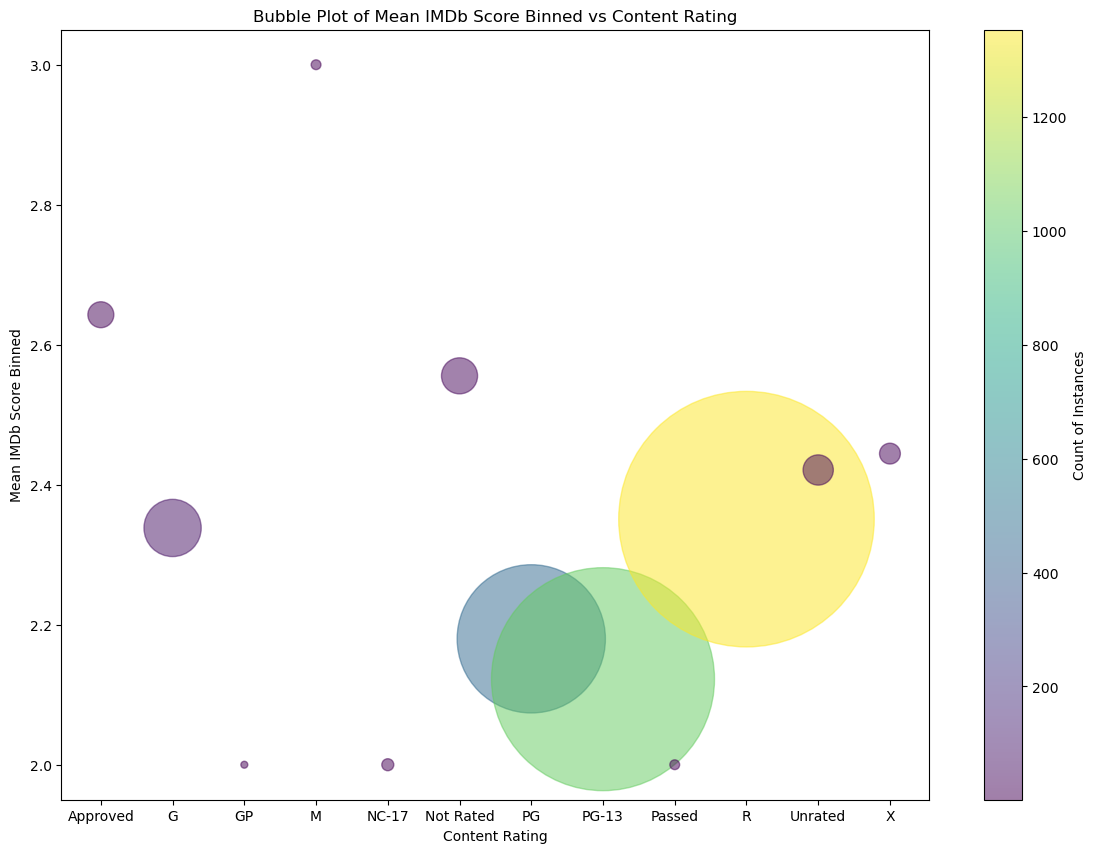

In [48]:
# Group by content rating and calculate the count of instances and mean IMDb score
grouped_data = cleaned_df.groupby('content_rating').agg({'imdb_score_binned': 'mean', 'movie_title': 'size'}).reset_index()
grouped_data.columns = ['content_rating', 'imdb_score_mean', 'instance_count']

# Define the size of the bubbles based on the count of instances
sizes = grouped_data['instance_count'] * 25 

# Define a colormap
colors = grouped_data['instance_count']

# Create the bubble plot
plt.figure(figsize=(14, 10))
plt.scatter(grouped_data['content_rating'], grouped_data['imdb_score_mean'], s=sizes, c=colors, cmap='viridis', alpha=0.5)

# Set labels and title
plt.xlabel('Content Rating')
plt.ylabel('Mean IMDb Score Binned')
plt.title('Bubble Plot of Mean IMDb Score Binned vs Content Rating')

# Add color bar
plt.colorbar(label='Count of Instances')

# Show the plot
plt.show()

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- The data shows that there are only two instances with "Passed" and "M" ratings. These ratings are rare compared to others, which suggests that they may be outliers in the dataset and decrease model performance.

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

The content rating has changed overtime, some of the ratings are similar to each other. Here is the information according to Wikipedia
- From M to GP to PG 
- X replaced by NC-17

Current ratings:
- Rated G: General audiences – All ages admitted.
- Rated PG: Parental guidance suggested – Some material may not be suitable for children.
- Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
- Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
- Rated NC-17: Adults only – No one 17 and under admitted.


So M = PG = GP, X = NC-17

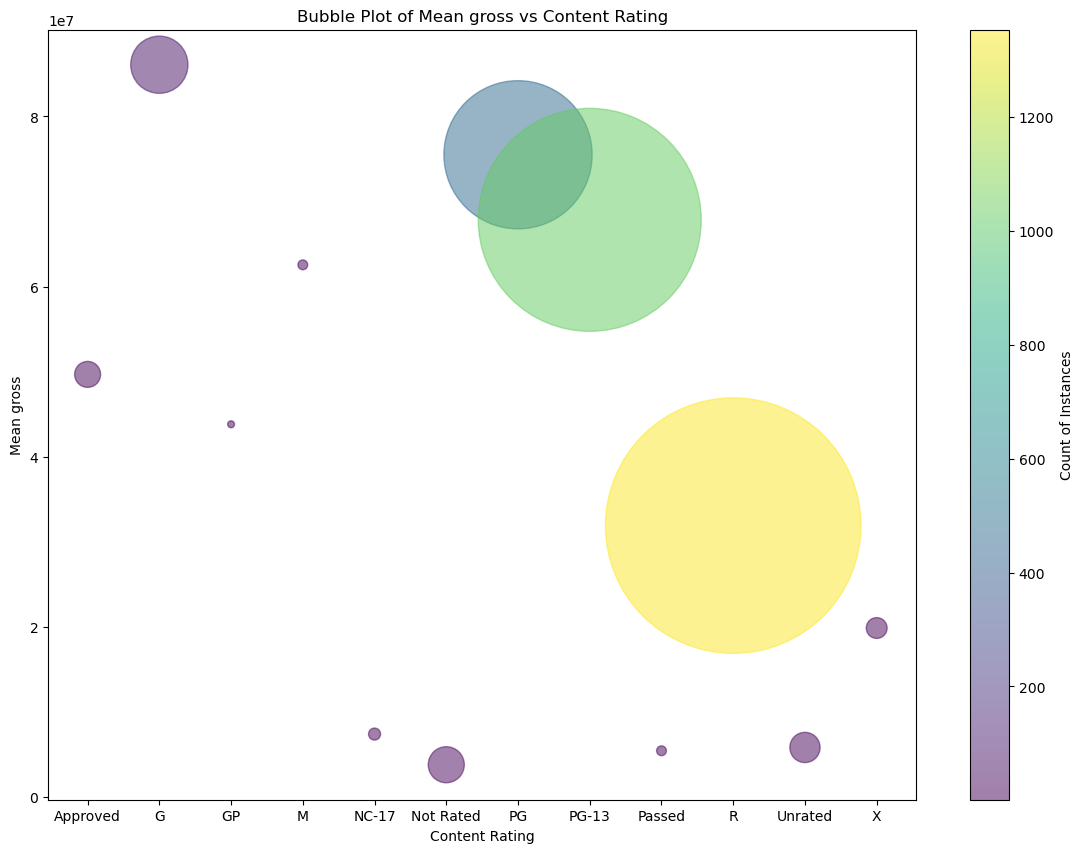

In [49]:
# Group by content rating and calculate the count of instances and mean IMDb score
grouped_data = cleaned_df.groupby('content_rating').agg({'gross': 'mean', 'movie_title': 'size'}).reset_index()
grouped_data.columns = ['content_rating', 'gross', 'instance_count']

# Define the size of the bubbles based on the count of instances
sizes = grouped_data['instance_count'] * 25 

# Define a colormap
colors = grouped_data['instance_count']

# Create the bubble plot
plt.figure(figsize=(14, 10))
plt.scatter(grouped_data['content_rating'], grouped_data['gross'], s=sizes, c=colors, cmap='viridis', alpha=0.5)

# Set labels and title
plt.xlabel('Content Rating')
plt.ylabel('Mean gross')
plt.title('Bubble Plot of Mean gross vs Content Rating')

# Add color bar
plt.colorbar(label='Count of Instances')

# Show the plot
plt.show()


<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>


- Some movies targeting adult audiences may not achieve high grosses.


To remove feature redundancy, I will replace GP with PG, X with NC-17.

In [50]:
def change_rating(x):
    if x == 'GP':
        return 'PG'
    if x == 'X':
        return 'NC-17'
    else:
        return x
    
plot_cleaned_df = cleaned_df.copy()
plot_cleaned_df.loc[:, 'content_rating'] = plot_cleaned_df['content_rating'].map(change_rating)

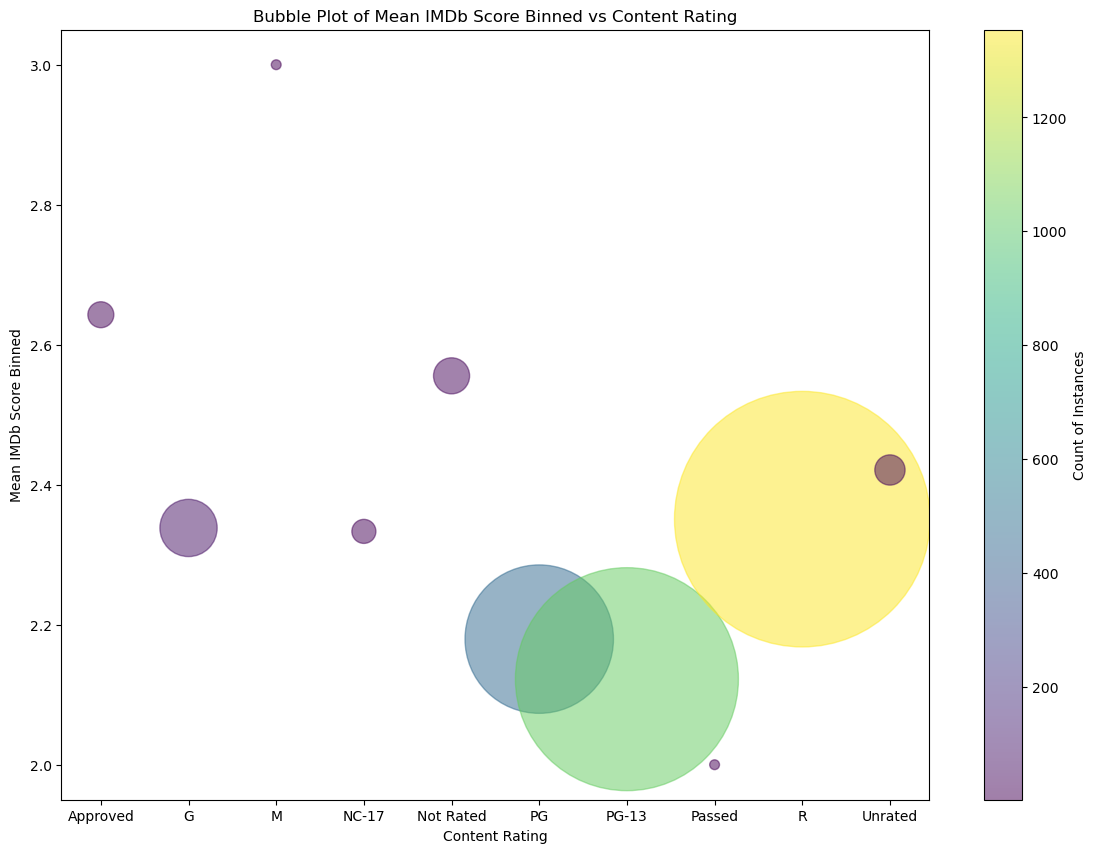

In [51]:
# Group by content rating and calculate the count of instances and mean IMDb score
grouped_data = plot_cleaned_df.groupby('content_rating').agg({'imdb_score_binned': 'mean', 'movie_title': 'size'}).reset_index()
grouped_data.columns = ['content_rating', 'imdb_score_mean', 'instance_count']

# Define the size of the bubbles based on the count of instances
sizes = grouped_data['instance_count'] * 25 

# Define a colormap
colors = grouped_data['instance_count']

# Create the bubble plot
plt.figure(figsize=(14, 10))
plt.scatter(grouped_data['content_rating'], grouped_data['imdb_score_mean'], s=sizes, c=colors, cmap='viridis', alpha=0.5)

# Set labels and title
plt.xlabel('Content Rating')
plt.ylabel('Mean IMDb Score Binned')
plt.title('Bubble Plot of Mean IMDb Score Binned vs Content Rating')

# Add color bar
plt.colorbar(label='Count of Instances')

# Show the plot
plt.show()


### Correlation

<Axes: >

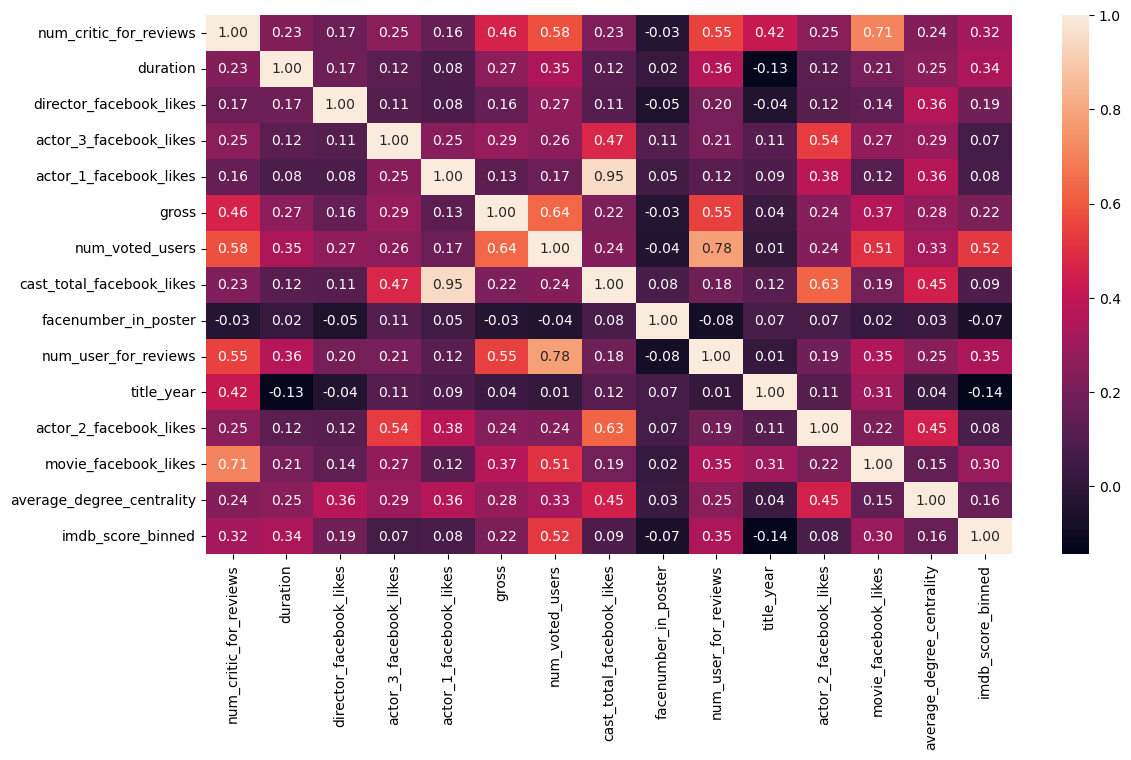

In [52]:
corr = cleaned_df[cont_cols].corr()
plt.figure(figsize=(13,7))

sns.heatmap(corr, annot=True, fmt='.2f')

<p style="color:purple; font-size:20px;"><strong>INSIGHT</strong></p>

- num_user_for_reviews, num_voted_users, num_critic_for_reviews have a strong correlation.
- cast_total_facebook_likes, and actor 1, 2, 3 have a strong correlation


## Model Training

For classification tasks, there are some models can be used including Decision Tree, Logistic Regression, OneR, ZeroR, Knn, Naive Bayes, Support Vector Machines.

In this exercise, I would like to focus on Decision Tree, Decision Tree with AdaBoosting and Random Forest, using ZeroR as a baseline.

As the dataset is imbalanced, I would like to evaluate model using Cross Validation to reduce the risk of overfitting by testing the model on different subsets of the data. This methods also provide a more reliable estimate of the model's performance and less variance than Holdout.

### Zero-R

- Model answer is a constant value (in this case, it is 2): the class that makes up the majority of the training data.
- ZeroR is useful for determining a baseline performance as a benchmark for other classification algorithms.

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import time

# Split train dataset
y = cleaned_df["imdb_score_binned"]
X = cleaned_df.drop("imdb_score_binned", axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [54]:
# Fit model and produce scores
def train_evaluate_model(model, X_train, y_train, cv=10):

    warnings.simplefilter(action='ignore', category=UserWarning)

    # Perform cross-validation and calculate multiple scoring metrics
    scoring = {'accuracy': 'accuracy', 
               'recall': 'recall_macro', 
               'precision': 'precision_macro'}
    start = time.time()
    results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    end = time.time()

    # Calculate average scores and time
    acc = results['test_accuracy'].mean()
    recall = results['test_recall'].mean()
    precision = results['test_precision'].mean()
    t = end - start

    # Print results
    print(f"Average scores ({cv}-fold cross-validation):")
    print("Accuracy:", acc)
    print(results['test_accuracy'])
    print("Recall (macro-averaged):", recall)
    print(results['test_recall'])
    print("Precision (macro-averaged):", precision)
    print(results['test_precision'])
    print("Time:", t)
    print("\n")

In [55]:
# Holdout evaluation
zeroR = DummyClassifier(strategy='most_frequent')
zeroR.fit(X_train,y_train)
y_pred = zeroR.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.60      0.75       986
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.60       986
   macro avg       0.20      0.12      0.15       986
weighted avg       1.00      0.60      0.75       986



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- The accuracy is high just by predicting the majority class, which indicates the imbalance of classes in the dataset.

- The macro-averaged recall and precision are very low, which means there are quite large numbers of false positives and false negatives.
- A low macro-averaged recall indicates that the model is missing a significant portion of positive instances.
- A low macro-averaged precision indicates that the model is incorrectly classifying many instances as positive when they are actually negative.

## Decision Tree

- A model that finds relevant features to learn a sequence of if-else questions about the features that leads to the correct classification or prediction of the target variable.
- Still it prones to overfitting without pruning.
- It struggles with irrelevant features, so choosing optimized max_depth is essential for this task.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

### Effect of Feature Engineering
### No Feature Engineering with OneHot Encoding

In [57]:
categorical_encode = [x for x in X_train.columns if X_train[x].dtype == 'object' and x != 'title_embedding']
print(categorical_encode)

remain_cols = [x for x in X_train.columns if X_train[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(X_train[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(X_train[categorical_encode]))

# Put index back
OH_train.index = X_train.index

# Merge the onehot data with the rest
OH_X_train = pd.concat([OH_train, X_train[remain_cols]], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype("str")

['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating']


In [58]:
# Cross-validation on X_train dataset
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy", random_state=42)

print("Decision Tree IG")
train_evaluate_model(dt_IG, OH_X_train, y_train)

Decision Tree IG
Average scores (10-fold cross-validation):
Accuracy: 0.618
[0.67  0.605 0.585 0.63  0.68  0.565 0.605 0.585 0.635 0.62 ]
Recall (macro-averaged): 0.38960774014865285
[0.36997164 0.38535022 0.43060038 0.37289243 0.44700125 0.34782677
 0.42454934 0.32681847 0.41981341 0.3712535 ]
Precision (macro-averaged): 0.38919707007553833
[0.42079219 0.38486839 0.3762933  0.37037441 0.46058528 0.3489926
 0.38691554 0.3290812  0.4297443  0.38432349]
Time: 7.019859552383423




In [59]:
# Look at some most important features
dt_IG.fit(OH_X_train, y_train)

importances_dt_IG = dt_IG.feature_importances_
indices_dt_IG = np.argsort(importances_dt_IG)[::-1]  # Sort feature importances in descending order
top_features_dt_IG = OH_X_train.columns[indices_dt_IG][:3]  # Get the top 3 feature names
print("Top 3 features for DT IG:", top_features_dt_IG)

Top 3 features for DT IG: Index(['num_voted_users', 'gross', 'duration'], dtype='object')


### Feature Engineering

First, let's explore the effect of feature engineering.

In [60]:
tree_X_train = X_train.copy()
tree_X_train['other_actors_facebook_likes'] = tree_X_train['actor_3_facebook_likes'].copy() + tree_X_train['actor_2_facebook_likes'].copy()
tree_X_train = tree_X_train.drop(['cast_total_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes'], axis=1)

tree_X_test = X_test.copy()
tree_X_test['other_actors_facebook_likes'] = tree_X_test['actor_3_facebook_likes'].copy() + tree_X_test['actor_2_facebook_likes'].copy()
tree_X_test = tree_X_test.drop(['cast_total_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes'], axis=1)


- num_user_for_reviews and num_critic_for_reviews do show good relationship with imdb_score_binned, therefore, I will create a ratio feature between num_user_critic and num_user_for_review

In [61]:
tree_X_train['ratio_user_critic_review'] = tree_X_train['num_critic_for_reviews'] / tree_X_train['num_user_for_reviews']
tree_X_train = tree_X_train.drop(['num_critic_for_reviews', 'num_user_for_reviews'], axis=1)

tree_X_test['ratio_user_critic_review'] = tree_X_test['num_critic_for_reviews'] / tree_X_test['num_user_for_reviews']
tree_X_test = tree_X_test.drop(['num_critic_for_reviews', 'num_user_for_reviews'], axis=1)

['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'facenumber_in_poster', 'title_year', 'movie_facebook_likes', 'average_degree_centrality', 'other_actors_facebook_likes', 'ratio_user_critic_review']


<Axes: >

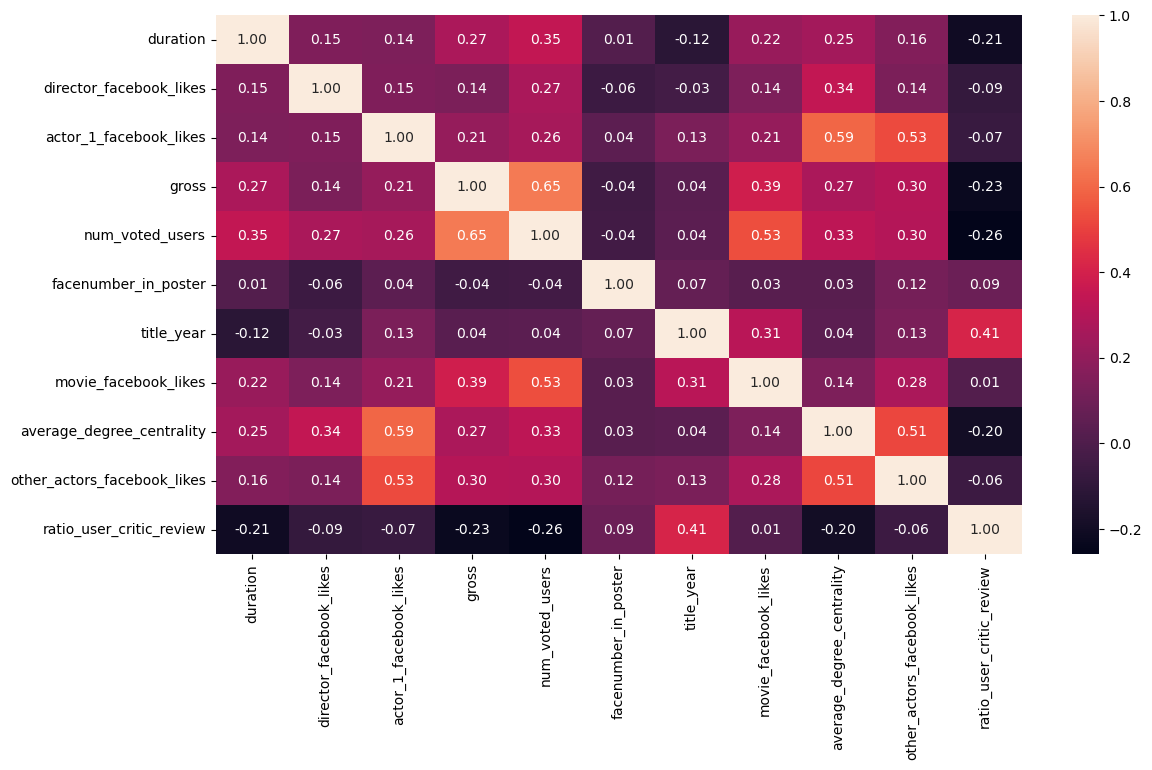

In [62]:
# Get the name of the columns
cont_col_tree = [x for x in tree_X_train.columns if tree_X_train[x].dtype != 'object' ]
print(cont_col_tree)

corr = tree_X_train[cont_col_tree].corr()
plt.figure(figsize=(13,7))

sns.heatmap(corr, annot=True, fmt='.2f')


- Normalize content rating.
- Convert country values to USA, UK and others.
- Convert language values to 0 and 1, 1 for English, 0 for not-english.
- OneHot Encoding: Computer can only understand number, so this method is still beneficial for Decision Tree althought Decision Tree can work with categorical data.

In [63]:
tree_X_train.loc[:, 'content_rating'] = tree_X_train['content_rating'].map(change_rating)
tree_X_train = tree_X_train.drop('title_embedding', axis=1)

In [64]:
# Convert all countries to USA, UK or others
def country_processing(x):
    if x != "USA" and x != "UK":
        return 'Others'
    else:
        return x

In [65]:
# Create new feature indicating whether a movie is in english
def language_processing(x):
    if x == "English":
        return 1
    else:
        return 0

In [66]:
# Country feature engineering
tree_X_train.loc[:, 'country'] = tree_X_train['country'].map(country_processing)
tree_X_train.head()

tree_X_test.loc[:, 'country'] = tree_X_test['country'].map(country_processing)

# Language feature engineering
tree_X_train.loc[:, 'is_english'] = tree_X_train['language'].map(language_processing)
tree_X_train = tree_X_train.drop('language', axis=1)

tree_X_test.loc[:, 'is_english'] = tree_X_test['language'].map(language_processing)
tree_X_test = tree_X_test.drop('language', axis=1)

- I will convert each genre into a column. If a movie is that genre, the value of the column is 1, otherwise it is 0.

In [67]:
def genre_preprocess(df):
    df.loc[:, dict_genres.keys()] = 0
    
    for i in df.index:
        keywords = df.loc[i, 'genres'].split("|")
        for word in keywords:
            df.loc[i, word] = 1
    
    df = df.drop(['genres'], axis=1)
            
    return df

In [68]:
my_tree_X_train = genre_preprocess(tree_X_train.copy())
my_tree_X_test = genre_preprocess(tree_X_test.copy())

my_tree_X_train.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_22180\2798655884.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_genres.keys()] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_22180\2798655884.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_genres.keys()] = 0


,director_name,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,...,Romance,War,Comedy,Western,Biography,History,Sport,Music,Documentary,Film-Noir
855,David Cronenberg,96,0,Naomi Watts,10000,17114882,Viggo Mortensen,Eastern Promises,189249,Raza Jaffrey,...,0,0,0,0,0,0,0,0,0,0
1324,Adam McKay,143,285,Will Ferrell,11000,2175312,Harrison Ford,Anchorman 2: The Legend Continues,131227,Steve Carell,...,0,0,1,0,0,0,0,0,0,0
1554,Chris Columbus,118,0,Rosario Dawson,8000,88761720,Logan Lerman,Percy Jackson & the Olympians: The Lightning T...,141179,Steve Coogan,...,0,0,0,0,0,0,0,0,0,0
1519,Bobby Farrelly,104,101,KaDee Strickland,787,42071069,Jimmy Fallon,Fever Pitch,36223,Ione Skye,...,1,0,1,0,0,0,1,0,0,0
713,Gavin O'Connor,140,149,Frank Grillo,27000,13651662,Tom Hardy,Warrior,332276,Kevin Dunn,...,0,0,0,0,0,0,1,0,0,0


- I will do the same thing to plot_keywords

In [69]:
def plot_keywords_preprocess(df):
    df.loc[:, dict_keywords.keys()] = 0
    
    for i in df.index:
        keywords = df.loc[i, 'plot_keywords'].split("|")
        for word in keywords:
            if word in dict_keywords.keys(): # Ignore new keywords
                df.loc[i, word] = 1
    
    df = df.drop(['plot_keywords'], axis=1)
            
    return df

In [70]:
my_tree_X_train = plot_keywords_preprocess(my_tree_X_train)
my_tree_X_test = plot_keywords_preprocess(my_tree_X_test)

my_tree_X_train.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_22180\3125418963.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_keywords.keys()] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_22180\3125418963.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_keywords.keys()] = 0


,director_name,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,actor_3_name,...,ham radio,power outage,lifeboat,sailing ship,war on terrorism,ultimate fighting championship,formula 1,sex with a nurse,deal,caramel
855,David Cronenberg,96,0,Naomi Watts,10000,17114882,Viggo Mortensen,Eastern Promises,189249,Raza Jaffrey,...,0,0,0,0,0,0,0,0,0,0
1324,Adam McKay,143,285,Will Ferrell,11000,2175312,Harrison Ford,Anchorman 2: The Legend Continues,131227,Steve Carell,...,0,0,0,0,0,0,0,0,0,0
1554,Chris Columbus,118,0,Rosario Dawson,8000,88761720,Logan Lerman,Percy Jackson & the Olympians: The Lightning T...,141179,Steve Coogan,...,0,0,0,0,0,0,0,0,0,0
1519,Bobby Farrelly,104,101,KaDee Strickland,787,42071069,Jimmy Fallon,Fever Pitch,36223,Ione Skye,...,0,0,0,0,0,0,0,0,0,0
713,Gavin O'Connor,140,149,Frank Grillo,27000,13651662,Tom Hardy,Warrior,332276,Kevin Dunn,...,0,0,0,0,0,0,0,0,0,0


In [71]:
categorical_encode = [x for x in my_tree_X_train.columns if my_tree_X_train[x].dtype == 'object' ]
remain_cols = [x for x in my_tree_X_train.columns if my_tree_X_train[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(my_tree_X_train[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(my_tree_X_train[categorical_encode]))

# Put index back
OH_train.index = my_tree_X_train.index

# Merge the onehot data with the rest
tree_OH_X_train = pd.concat([OH_train, my_tree_X_train[remain_cols]], axis=1)

# Ensure all columns have string type
tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")

tree_OH_X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'ham radio', 'power outage', 'lifeboat', 'sailing ship',
       'war on terrorism', 'ultimate fighting championship', 'formula 1',
       'sex with a nurse', 'deal', 'caramel'],
      dtype='object', length=13081)

In [72]:
# Train Decision Tree Model
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy", random_state = 42)

print("Decision Tree IG")
train_evaluate_model(dt_IG, tree_OH_X_train, y_train)

Decision Tree IG
Average scores (10-fold cross-validation):
Accuracy: 0.6365000000000001
[0.665 0.655 0.62  0.585 0.65  0.62  0.625 0.66  0.615 0.67 ]
Recall (macro-averaged): 0.41570143375391677
[0.44666549 0.38037523 0.41800188 0.39329894 0.4795935  0.39412133
 0.36284788 0.36717268 0.3985136  0.51642383]
Precision (macro-averaged): 0.43108304776930817
[0.45603391 0.47735141 0.42461153 0.37317073 0.42064103 0.40457567
 0.38966176 0.4484854  0.42956522 0.48673382]
Time: 8.37047553062439




In [73]:
# Top 3 most important features
dt_IG.fit(tree_OH_X_train, y_train)

importances_dt_IG = dt_IG.feature_importances_
indices_dt_IG = np.argsort(importances_dt_IG)[::-1]  # Sort feature importances in descending order
top_features_dt_IG = tree_OH_X_train.columns[indices_dt_IG][:3]  # Get the top 3 feature names
print("Top 3 features for DT IG:", top_features_dt_IG)
print(sorted(importances_dt_IG, reverse=True)[:200])

Top 3 features for DT IG: Index(['num_voted_users', 'Drama', 'gross'], dtype='object')
[0.21452597674733542, 0.07263737134674843, 0.06636764098092143, 0.06120683262751027, 0.056249957476931, 0.05137158762354895, 0.04960036970447597, 0.03935766675713738, 0.035504804760684336, 0.033746258471956135, 0.03350203914785703, 0.022521294517445785, 0.01702679263233312, 0.01042671956905545, 0.010245763938259846, 0.008849402036662351, 0.007070646576375831, 0.007057887834655384, 0.006154968007381393, 0.005811684806194904, 0.0051839538144237175, 0.0044034519735972315, 0.004190898490888652, 0.0038635065460544695, 0.0037190901038983227, 0.00350364769627622, 0.0034721214521143025, 0.0033079312850629104, 0.0031001011313509233, 0.0029414995531420528, 0.002927209158577358, 0.002843202537399709, 0.002712813583811143, 0.0026750811996034897, 0.002653488200275408, 0.0026162801637052073, 0.0025412084549690066, 0.002519513877567394, 0.0024907765588085286, 0.0024729446556101082, 0.0024729446556101074, 0.00245444

## <p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- Without tuning hyperparameters, the accuracy is only slightly higher than that of the ZeroR baseline. However, the macro-averaged recall and precision are twice as high as those of the ZeroR baseline, indicating an improvement in the model's ability to predict classes other than class 2.

- The consistent scores across different iterations indicate that the model may not suffer from high variance.

- The performance of Decision Trees remained relatively stable regardless of whether feature engineering was applied or not. This suggests that the model's difficulty with high dimensionality and its tendency to overfit persisted in both cases.
- Only fewer than 200 features contributes to the Decision Tree prediction.

#### Embedding features

In this session, I will explore the effects of embedding features.

I expect features like director_name and movie_title might not be suitable for Decision Trees because their high cardinality, meaning a large number of distinct values, doesn't aid in generalization, and may prone to overfitting.

##### 1. features_countvec.zip

Description: Zipped file containing CountVectorizer features for director names, actor names, and possibly other text features for both training and test datasets.

As we have discussed above, this counts each word in name. I expect they may not be useful because to identify a person, individual word might not be useful, so may not affect how users reviewed.

Let's train model with embedding features instead of using OneHot Encoding on name_feature

In [74]:
tree_X_train_countvec = tree_X_train.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'], axis=1)
tree_X_test_countvec = tree_X_test.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'], axis=1)

In [75]:
categorical_encode = [x for x in tree_X_train_countvec.columns if tree_X_train_countvec[x].dtype == 'object']
remain_cols = [x for x in tree_X_train_countvec.columns if tree_X_train_countvec[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(tree_X_train_countvec[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(tree_X_train_countvec[categorical_encode]))

# Put index back
OH_train.index = X_train.index

# Merge the onehot data with the rest
tree_OH_X_train = pd.concat([OH_train, tree_X_train_countvec[remain_cols]], axis=1)

# Ensure all columns have string type
tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")

len(tree_OH_X_train.columns)

4523

In [76]:
def create_feature_df(train_np_features, tree_OH_X_train, remain_cols):
    start = len([col for col in tree_OH_X_train.columns if col not in remain_cols]) + 1
    df_features = pd.DataFrame(train_np_features)
    df_features.columns = range(start, start + len(train_np_features[0]))
    return pd.concat([tree_OH_X_train, df_features.loc[tree_OH_X_train.index,:]], axis=1)

In [77]:
# Create DataFrame for director name
tree_OH_X_train = create_feature_df(train_countvec_features_director_name, tree_OH_X_train, remain_cols)

# Create DataFrame for actor 1 name
tree_OH_X_train = create_feature_df(train_countvec_features_actor_1_name, tree_OH_X_train, remain_cols)

# Create DataFrame for actor 2 name
tree_OH_X_train = create_feature_df(train_countvec_features_actor_2_name, tree_OH_X_train, remain_cols)

# Create DataFrame for actor 3 name
tree_OH_X_train = create_feature_df(actor_3_count_array, tree_OH_X_train, remain_cols)

tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")
len(tree_OH_X_train.columns)

14529

In [78]:
# Train Decision Tree Model
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy")

print("Decision Tree IG")
train_evaluate_model(dt_IG, tree_OH_X_train, y_train)

Decision Tree IG
Average scores (10-fold cross-validation):
Accuracy: 0.6115
[0.635 0.615 0.63  0.63  0.595 0.53  0.695 0.59  0.62  0.575]
Recall (macro-averaged): 0.3999533564621152
[0.36146875 0.43308943 0.47788618 0.43796748 0.38262351 0.33866479
 0.41046806 0.3330487  0.39320051 0.43111616]
Precision (macro-averaged): 0.40365756407162606
[0.4357763  0.41588355 0.49251047 0.41380275 0.33869697 0.3325405
 0.45092933 0.35961988 0.40376033 0.39305556]
Time: 9.491551399230957




<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- As I expected, the model didn't improve althought it took longer to run.

##### feature_doc2vec

Description: Zipped file containing Doc2Vec features for plot keywords, genres, and other text features for both training and test datasets.

Unlike CountVec, Doc2Vec uses neural networks to understand documents. It maps each document to a fixed-length vector in a high-dimensional space. Documents with similar are close to each other.

When this method is used for plot keywords and genres, it utilized for the genres and plot keywords columns to generate meaningful vector representations of these textual features.

In [79]:
tree_X_train_docvec = tree_X_train.drop(['genres', 'plot_keywords'], axis=1)

In [80]:
# OneHot other attributes first
categorical_encode = [x for x in tree_X_train_docvec.columns if tree_X_train_docvec[x].dtype == 'object' and x != 'title_embedding']
remain_cols = [x for x in tree_X_train_docvec.columns if tree_X_train_docvec[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(tree_X_train_docvec[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(tree_X_train_docvec[categorical_encode]))

# Put index back
OH_train.index = X_train.index

# Merge the onehot data with the rest
tree_OH_X_train = pd.concat([OH_train, tree_X_train_docvec[remain_cols]], axis=1)

# Ensure all columns have string type
tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")

len(tree_OH_X_train.columns)

7167

In [81]:
tree_OH_X_train = create_feature_df(genres_np, tree_OH_X_train, remain_cols)
tree_OH_X_train = create_feature_df(plotkeywords_np, tree_OH_X_train, remain_cols)

tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")
len(tree_OH_X_train.columns)

7367

In [82]:
# Train Decision Tree Model
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy", random_state=42)

print("Decision Tree IG")
train_evaluate_model(dt_IG, tree_OH_X_train, y_train)

Decision Tree IG
Average scores (10-fold cross-validation):
Accuracy: 0.5654999999999999
[0.56  0.605 0.495 0.575 0.64  0.56  0.625 0.55  0.55  0.495]
Recall (macro-averaged): 0.3579325853563601
[0.3328087  0.36032208 0.27998124 0.36667292 0.39951845 0.34620075
 0.33715212 0.27567995 0.50372391 0.37726575]
Precision (macro-averaged): 0.3520484405252563
[0.34570289 0.40195489 0.32244173 0.3381522  0.40081416 0.32657849
 0.41331885 0.28070175 0.38393112 0.30688832]
Time: 10.935856103897095




<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- New features led to performance degradation. Some reasons might be the features are not compatible with Decision Tree.
- The Decision Tree algorithm chooses one attribute to split on, however, we need all dimensions in Doc2Vec to capture meaningful information. Points close to each other in the Doc2Vec embedding space have more similar meanings. Therefore, each individual dimension in Doc2Vec might not be useful when considered separately.

##### FastText

It employed to create embeddings for the movie titles, capturing the semantic meaning of the titles in a dense vector form.


In [83]:
title_embedding = np.load('project_data/features_fasttext/train_fasttext_title_embeddings.npy')
title_embedding = np.delete(title_embedding, dup_index, axis=0)
np.shape(title_embedding)

(2986, 100)

In [84]:
tree_X_train_title = tree_X_train.drop(['movie_title'], axis=1)

# OneHot other attributes first
categorical_encode = [x for x in tree_X_train_title.columns if tree_X_train_title[x].dtype == 'object' and x != 'title_embedding']
remain_cols = [x for x in tree_X_train_title.columns if tree_X_train_title[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(tree_X_train_title[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(tree_X_train_title[categorical_encode]))

# Put index back
OH_train.index = X_train.index

# Merge the onehot data with the rest
tree_OH_X_train = pd.concat([OH_train, tree_X_train_title[remain_cols]], axis=1)

# Ensure all columns have string type
tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")

len(tree_OH_X_train.columns)


7713

In [85]:
tree_OH_X_train = create_feature_df(title_embedding, tree_OH_X_train, remain_cols)

tree_OH_X_train.columns = tree_OH_X_train.columns.astype("str")
len(tree_OH_X_train.columns)

7813

In [86]:
# Train Decision Tree Model
dt_IG = DecisionTreeClassifier(max_depth=None, criterion="entropy", random_state=42)

print("Decision Tree IG")
train_evaluate_model(dt_IG, tree_OH_X_train, y_train)

Decision Tree IG
Average scores (10-fold cross-validation):
Accuracy: 0.5684999999999999
[0.585 0.62  0.59  0.59  0.535 0.555 0.59  0.545 0.555 0.52 ]
Recall (macro-averaged): 0.36677616274979397
[0.36911615 0.44137586 0.40441213 0.36206379 0.35366479 0.34013446
 0.37820999 0.30302815 0.35441967 0.36133663]
Precision (macro-averaged): 0.36722182059939756
[0.35763348 0.46076271 0.41258472 0.34006649 0.32286972 0.32409958
 0.40828769 0.29807665 0.3486181  0.39921907]
Time: 8.185066938400269




<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- New features led to performance degradation, similarly to the Doc2Vec case and the same reasons can be applied.

## Final Decision Tree.

After experimenting with different features, let's train the model on the whole X_train and observe its performance on X_test.

### Tuning Hyperparameters

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [88]:
tree_X_train_addition = tree_X_train.drop(['genres', 'plot_keywords', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'director_name'],axis=1)
tree_X_test_addition = tree_X_test.drop(['genres', 'plot_keywords', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'director_name'],axis=1)

In [89]:
categorical_encode = [x for x in tree_X_train_addition.columns if tree_X_train_addition[x].dtype == 'object']
print(categorical_encode)

remain_cols = [x for x in tree_X_train_addition.columns if tree_X_train_addition[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(tree_X_train_addition[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(tree_X_train_addition[categorical_encode]))
OH_test = pd.DataFrame(OH_Encode.transform(tree_X_test_addition[categorical_encode]))

# Put index back
OH_train.index = tree_X_train_addition.index
OH_test.index = tree_X_test_addition.index

# Merge the onehot data with the rest
OH_tree_X_train_a = pd.concat([OH_train, tree_X_train_addition[remain_cols]], axis=1)
OH_tree_X_test_a = pd.concat([OH_test, tree_X_test_addition[remain_cols]], axis=1)

# Ensure all columns have string type
OH_tree_X_train_a.columns = OH_tree_X_train_a.columns.astype("str")
OH_tree_X_test_a.columns = OH_tree_X_test_a.columns.astype("str")

len(OH_tree_X_train_a.columns)

['country', 'content_rating']


25

In [90]:
OH_tree_X_train_a = create_feature_df(title_embedding, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(genres_np, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(plotkeywords_np, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(train_countvec_features_director_name, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(train_countvec_features_actor_1_name, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(train_countvec_features_actor_2_name, OH_tree_X_train_a, remain_cols)
OH_tree_X_train_a = create_feature_df(actor_3_count_array, OH_tree_X_train_a, remain_cols)

OH_tree_X_train_a.columns = OH_tree_X_train_a.columns.astype("str")
len(OH_tree_X_train_a.columns)

10331

In [91]:
OH_tree_X_test_a = create_feature_df(title_embedding, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(genres_np, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(plotkeywords_np, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(train_countvec_features_director_name, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(train_countvec_features_actor_1_name, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(train_countvec_features_actor_2_name, OH_tree_X_test_a, remain_cols)
OH_tree_X_test_a = create_feature_df(actor_3_count_array, OH_tree_X_test_a, remain_cols)

OH_tree_X_test_a.columns = OH_tree_X_test_a.columns.astype("str")
len(OH_tree_X_test_a.columns)

10331

In [92]:
OH_tree_X_sub_train, X_validation, y_sub_train, y_validation = train_test_split(OH_tree_X_train_a, y_train, test_size=0.2, random_state=0)

In [93]:
# Test on validation dataset
for n in [3, 10, 100, 1000, None]:
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy", random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)
    print("Accuracy: ", dt_IG.score(X_validation, y_validation))
    
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")

Decision Tree IG with max_depth = 3
Accuracy:  0.6625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.93      0.69      0.79       348
           3       0.23      0.46      0.31        48
           4       0.20      0.75      0.32         4

    accuracy                           0.66       400
   macro avg       0.27      0.38      0.28       400
weighted avg       0.84      0.66      0.73       400



Decision Tree IG with max_depth = 10
Accuracy:  0.5975
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.26      0.26      0.26        31
           2       0.70      0.73      0.72       246
           3       0.45      0.41      0.43       106
           4       0.53      0.53      0.53        15

    accuracy                           0.60       400
   macro avg       0

In [94]:
# Run for the second time with smaller range of potential hyperparameters
for n in range(3, 50, 5):
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy", random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)
    print("Accuracy: ", dt_IG.score(X_validation, y_validation))
    
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")

Decision Tree IG with max_depth = 3
Accuracy:  0.6625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.93      0.69      0.79       348
           3       0.23      0.46      0.31        48
           4       0.20      0.75      0.32         4

    accuracy                           0.66       400
   macro avg       0.27      0.38      0.28       400
weighted avg       0.84      0.66      0.73       400



Decision Tree IG with max_depth = 8
Accuracy:  0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.19      0.13        16
           2       0.80      0.71      0.75       289
           3       0.35      0.41      0.38        80
           4       0.53      0.53      0.53        15

    accuracy                           0.62       400
   macro avg       0.3

Scores were unchanged after n = 23, therefore, I will test one more time for n between 5 and 30.

This last run, I use Cross-validation to get a better view on the model performance

In [95]:
# Last run
for n in range(5, 30, 5):
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    train_evaluate_model(dt_IG, OH_tree_X_train_a, y_train, cv=5)

Decision Tree IG with max_depth = 5
Average scores (5-fold cross-validation):
Accuracy: 0.6419999999999999
[0.6325 0.6275 0.6475 0.67   0.6325]
Recall (macro-averaged): 0.30584827365699174
[0.29558704 0.33296787 0.29043866 0.33845712 0.27179068]
Precision (macro-averaged): 0.3444200876667668
[0.41694444 0.331122   0.30392385 0.39405268 0.27605745]
Time: 4.6597371101379395


Decision Tree IG with max_depth = 10
Average scores (5-fold cross-validation):
Accuracy: 0.5885
[0.5725 0.5975 0.59   0.605  0.5775]
Recall (macro-averaged): 0.33206434791355754
[0.32997062 0.35266581 0.34344448 0.32718627 0.30705456]
Precision (macro-averaged): 0.3520240946960874
[0.38767234 0.32872403 0.33958207 0.38324176 0.32090027]
Time: 6.345816135406494


Decision Tree IG with max_depth = 15
Average scores (5-fold cross-validation):
Accuracy: 0.5605
[0.565  0.5425 0.56   0.6    0.535 ]
Recall (macro-averaged): 0.33059028902208054
[0.32531474 0.33329527 0.3495398  0.35266255 0.29213909]
Precision (macro-averag

Decision Tree IG with max_depth = 5
Accuracy:  0.6475
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.87      0.70      0.78       321
           3       0.29      0.44      0.35        63
           4       0.47      0.58      0.52        12

    accuracy                           0.65       400
   macro avg       0.33      0.35      0.33       400
weighted avg       0.76      0.65      0.69       400





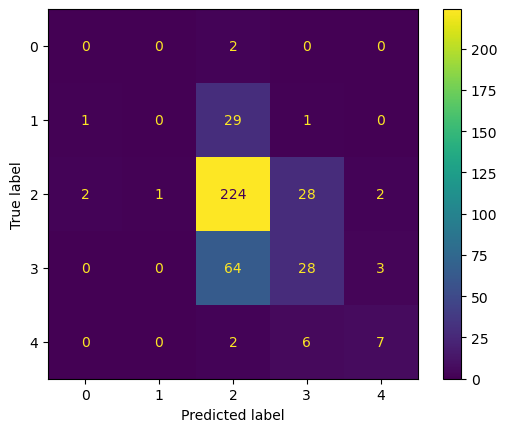

Decision Tree IG with max_depth = 6
Accuracy:  0.65
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.03      0.33      0.06         3
           2       0.87      0.70      0.78       321
           3       0.31      0.46      0.37        63
           4       0.40      0.55      0.46        11

    accuracy                           0.65       400
   macro avg       0.32      0.41      0.33       400
weighted avg       0.76      0.65      0.69       400





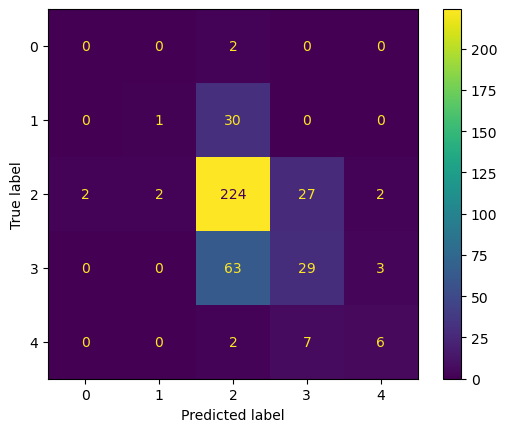

Decision Tree IG with max_depth = 7
Accuracy:  0.65
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.03      0.17      0.05         6
           2       0.85      0.71      0.78       308
           3       0.35      0.47      0.40        70
           4       0.47      0.47      0.47        15

    accuracy                           0.65       400
   macro avg       0.34      0.36      0.34       400
weighted avg       0.73      0.65      0.69       400





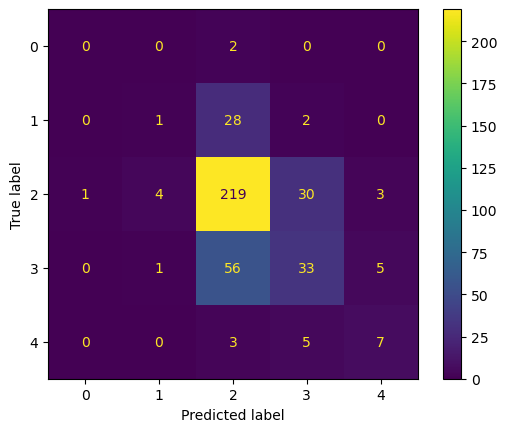

Decision Tree IG with max_depth = 8
Accuracy:  0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.19      0.13        16
           2       0.80      0.71      0.75       289
           3       0.35      0.41      0.38        80
           4       0.53      0.53      0.53        15

    accuracy                           0.62       400
   macro avg       0.36      0.37      0.36       400
weighted avg       0.67      0.62      0.65       400





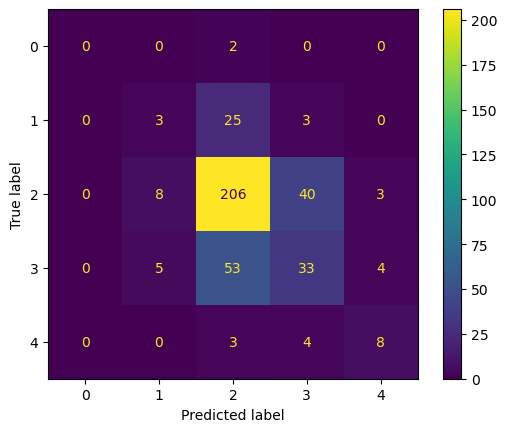

Decision Tree IG with max_depth = 9
Accuracy:  0.615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.19      0.25      0.22        24
           2       0.73      0.74      0.74       254
           3       0.46      0.41      0.44       107
           4       0.53      0.53      0.53        15

    accuracy                           0.61       400
   macro avg       0.38      0.39      0.38       400
weighted avg       0.62      0.61      0.62       400





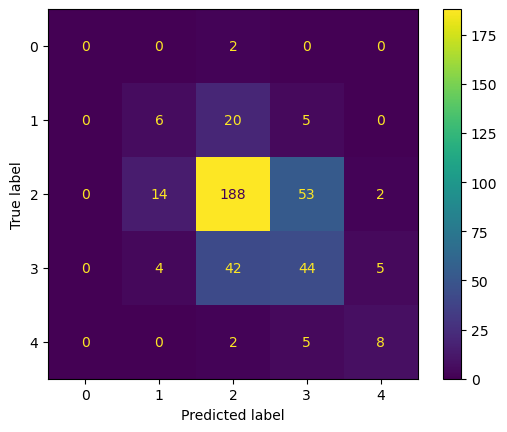

Decision Tree IG with max_depth = 10
Accuracy:  0.5975
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.26      0.26      0.26        31
           2       0.70      0.73      0.72       246
           3       0.45      0.41      0.43       106
           4       0.53      0.53      0.53        15

    accuracy                           0.60       400
   macro avg       0.39      0.39      0.39       400
weighted avg       0.59      0.60      0.59       400





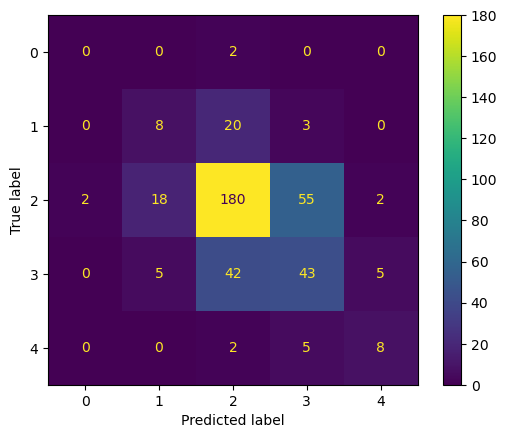

Decision Tree IG with max_depth = 11
Accuracy:  0.5825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.16      0.19      0.17        27
           2       0.72      0.72      0.72       255
           3       0.41      0.38      0.39       103
           4       0.33      0.36      0.34        14

    accuracy                           0.58       400
   macro avg       0.32      0.33      0.33       400
weighted avg       0.58      0.58      0.58       400





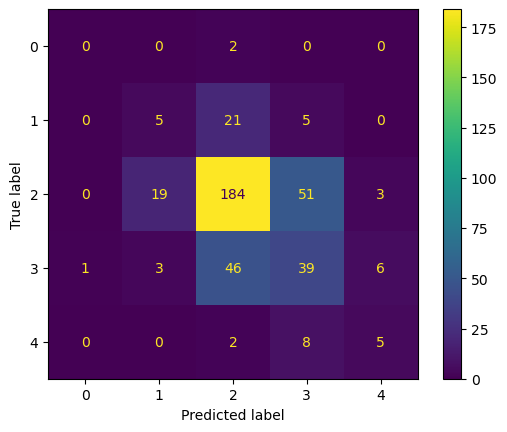

Decision Tree IG with max_depth = 12
Accuracy:  0.595
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.23      0.19      0.21        36
           2       0.70      0.74      0.72       245
           3       0.45      0.42      0.43       103
           4       0.47      0.50      0.48        14

    accuracy                           0.59       400
   macro avg       0.37      0.37      0.37       400
weighted avg       0.58      0.59      0.59       400





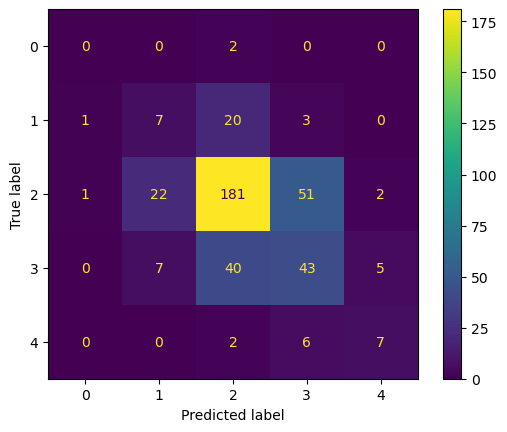

Decision Tree IG with max_depth = 13
Accuracy:  0.59
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.23      0.23      0.23        31
           2       0.70      0.73      0.72       245
           3       0.44      0.39      0.42       107
           4       0.47      0.44      0.45        16

    accuracy                           0.59       400
   macro avg       0.37      0.36      0.36       400
weighted avg       0.58      0.59      0.59       400





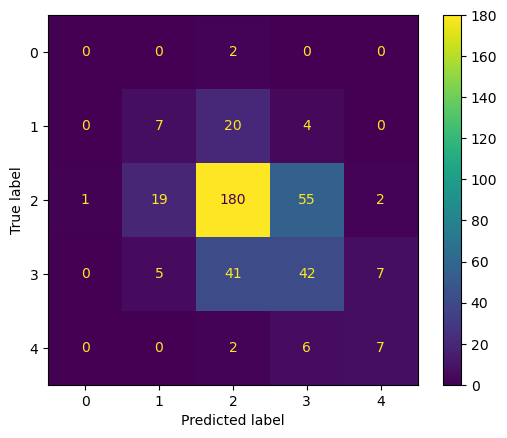

Decision Tree IG with max_depth = 14
Accuracy:  0.585
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.19      0.21      0.20        28
           2       0.69      0.74      0.71       241
           3       0.47      0.39      0.43       116
           4       0.33      0.42      0.37        12

    accuracy                           0.58       400
   macro avg       0.34      0.35      0.34       400
weighted avg       0.58      0.58      0.58       400





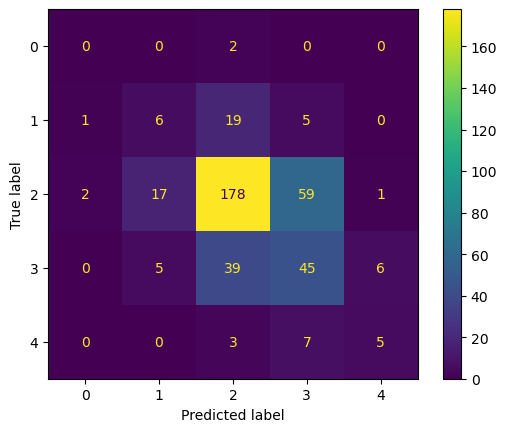

Decision Tree IG with max_depth = 15
Accuracy:  0.585
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.19      0.21      0.20        28
           2       0.69      0.73      0.71       241
           3       0.47      0.39      0.43       115
           4       0.40      0.46      0.43        13

    accuracy                           0.58       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.58      0.58      0.58       400





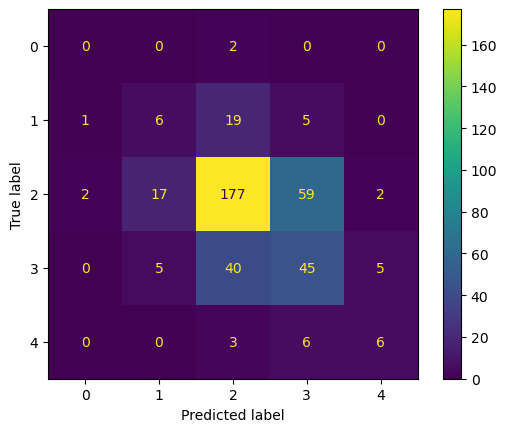

In [96]:
# Run with validation set
for n in list(range(5, 16, 1)):
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)


    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)
    print("Accuracy: ", dt_IG.score(X_validation, y_validation))
    
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")

    cm = confusion_matrix(y_validation, y_pred_validation, labels=dt_IG.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_IG.classes_)
    disp.plot()
    plt.show()

In [97]:
# Run with cross validation
test_hyper = list(range(10, 16, 1))

for n in test_hyper:
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    train_evaluate_model(dt_IG, OH_tree_X_train_a, y_train, cv=5)

Decision Tree IG with max_depth = 10
Average scores (5-fold cross-validation):
Accuracy: 0.5885
[0.5725 0.5975 0.59   0.605  0.5775]
Recall (macro-averaged): 0.33206434791355754
[0.32997062 0.35266581 0.34344448 0.32718627 0.30705456]
Precision (macro-averaged): 0.3520240946960874
[0.38767234 0.32872403 0.33958207 0.38324176 0.32090027]
Time: 6.332791328430176


Decision Tree IG with max_depth = 11
Average scores (5-fold cross-validation):
Accuracy: 0.575
[0.57   0.57   0.5775 0.6025 0.555 ]
Recall (macro-averaged): 0.32991800657900017
[0.34398633 0.32414443 0.34845214 0.32750859 0.30549854]
Precision (macro-averaged): 0.3507271629332068
[0.42637843 0.3082019  0.33472891 0.36958465 0.31474193]
Time: 6.604963779449463


Decision Tree IG with max_depth = 12
Average scores (5-fold cross-validation):
Accuracy: 0.5685
[0.5725 0.5425 0.5825 0.5825 0.5625]
Recall (macro-averaged): 0.3258206544089149
[0.32551717 0.3257958  0.35005332 0.33571074 0.29202624]
Precision (macro-averaged): 0.3405285

Decision Tree IG with choosen max_depth
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.20      0.14      0.17        79
           2       0.68      0.72      0.70       595
           3       0.42      0.42      0.42       254
           4       0.77      0.68      0.72        50

    accuracy                           0.59       986
   macro avg       0.42      0.39      0.40       986
weighted avg       0.57      0.59      0.58       986



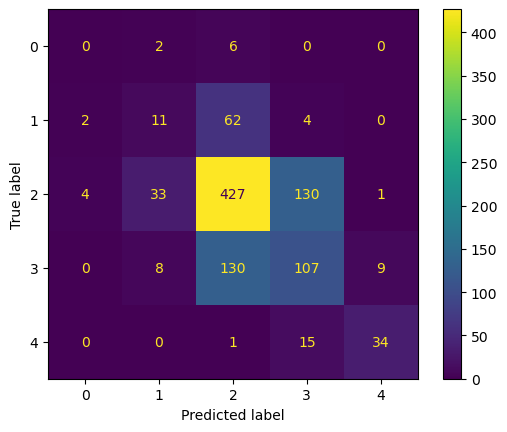

In [98]:
# Hold-out evaliation
print(f"Decision Tree IG with choosen max_depth")
dt_IG = DecisionTreeClassifier(max_depth=12, criterion="entropy",  random_state=42)
dt_IG.fit(OH_tree_X_train_a, y_train)
y_pred = dt_IG.predict(OH_tree_X_test_a)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=dt_IG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_IG.classes_)
disp.plot()
plt.show()

In [99]:
# Top most important features
importances_dt_IG = dt_IG.feature_importances_
indices_dt_IG = np.argsort(importances_dt_IG)[::-1] 
top_features_dt_IG = OH_tree_X_train_a.columns[indices_dt_IG][:12] 
print("Top features for DT IG:", top_features_dt_IG)
print(sorted(importances_dt_IG, reverse=True)[:200])

Top features for DT IG: Index(['num_voted_users', 'duration', 'is_english', 'gross', 'title_year',
       'ratio_user_critic_review', '297', '156', '226',
       'other_actors_facebook_likes', '137', '208'],
      dtype='object')
[0.1684006010304619, 0.03501575929842909, 0.032181690229209664, 0.03153010833957164, 0.01901816292442422, 0.016999968937612676, 0.01577336934947247, 0.014509106990024627, 0.012390606927175661, 0.011276942145175061, 0.011159115467041144, 0.010933380339273466, 0.010196737242528404, 0.009875644964782958, 0.009756590027873881, 0.009466451197165288, 0.00945314321297075, 0.009451004734312455, 0.008664692777325914, 0.008524455617863516, 0.008276704363069817, 0.007707601190069107, 0.00768252347352142, 0.007606330915714363, 0.007514896302899357, 0.007344671811327334, 0.007331628975747845, 0.007090427933493213, 0.006974198173633882, 0.006930690218596119, 0.006907374361522295, 0.0068493463864018845, 0.006842175901827718, 0.006820675453685995, 0.006775112901975986, 0.0065

### OneHot Encoding

In [100]:
tree_X_train_final = my_tree_X_train.copy()
tree_X_test_final = my_tree_X_test.copy()

In [101]:
categorical_encode = [x for x in tree_X_train_final.columns if tree_X_train_final[x].dtype == 'object']
remain_cols = [x for x in tree_X_train_final.columns if tree_X_train_final[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(tree_X_train_final[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(tree_X_train_final[categorical_encode]))
OH_test = pd.DataFrame(OH_Encode.transform(tree_X_test_final[categorical_encode]))

# Put index back
OH_train.index = tree_X_train_final.index
OH_test.index = tree_X_test_final.index

# Merge the onehot data with the rest
OH_tree_X_train = pd.concat([OH_train, tree_X_train_final[remain_cols]], axis=1)
OH_tree_X_test = pd.concat([OH_test, tree_X_test_final[remain_cols]], axis=1)

# Ensure all columns have string type
OH_tree_X_train.columns = OH_tree_X_train.columns.astype("str")
OH_tree_X_test.columns = OH_tree_X_test.columns.astype("str")

len(OH_tree_X_train.columns)

13081

Let's decide on the n values:

In [102]:
OH_tree_X_sub_train, X_validation, y_sub_train, y_validation = train_test_split(OH_tree_X_train, y_train, test_size=0.2, random_state=0)

In [103]:
for n in [3, 10, 100, 500, 1000, None]:
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)


    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)    
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")
    

Decision Tree IG with max_depth = 3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.92      0.75      0.82       316
           3       0.49      0.59      0.54        80
           4       0.20      0.75      0.32         4

    accuracy                           0.71       400
   macro avg       0.32      0.42      0.34       400
weighted avg       0.83      0.71      0.76       400



Decision Tree IG with max_depth = 10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.13      0.14      0.14        28
           2       0.78      0.74      0.76       271
           3       0.45      0.52      0.49        82
           4       0.60      0.60      0.60        15

    accuracy                           0.64       400
   macro avg       0.39      0.40      0.40       400
we

In [104]:
test_hyper = list(range(10, 50, 10))

for n in test_hyper:
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)
    print("Accuracy: ", dt_IG.score(X_validation, y_validation))
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")
    

Decision Tree IG with max_depth = 10
Accuracy:  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.13      0.14      0.14        28
           2       0.78      0.74      0.76       271
           3       0.45      0.52      0.49        82
           4       0.60      0.60      0.60        15

    accuracy                           0.64       400
   macro avg       0.39      0.40      0.40       400
weighted avg       0.65      0.64      0.64       400



Decision Tree IG with max_depth = 20
Accuracy:  0.6225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.22      0.22        32
           2       0.74      0.73      0.74       260
           3       0.44      0.48      0.46        88
           4       0.67      0.62      0.65        16

    accuracy                           0.62       400
   macro avg       0.

In [105]:
# Run with cross validation
test_hyper = list(range(10, 20, 1))

for n in test_hyper:
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)

    print(f"Decision Tree IG with max_depth = {n}")
    train_evaluate_model(dt_IG, OH_tree_X_train, y_train, cv=5)

Decision Tree IG with max_depth = 10
Average scores (5-fold cross-validation):
Accuracy: 0.673
[0.6675 0.6975 0.6775 0.6675 0.655 ]
Recall (macro-averaged): 0.4020394720992657
[0.39095076 0.39748856 0.4771713  0.37721371 0.36737303]
Precision (macro-averaged): 0.4398218164634214
[0.45447016 0.41727071 0.46615218 0.4536479  0.40756813]
Time: 3.4718213081359863


Decision Tree IG with max_depth = 11
Average scores (5-fold cross-validation):
Accuracy: 0.6675000000000001
[0.66   0.7175 0.6825 0.6425 0.635 ]
Recall (macro-averaged): 0.41099463570149447
[0.38518153 0.41905267 0.50137658 0.36343813 0.38592427]
Precision (macro-averaged): 0.4459595023133569
[0.42439815 0.44270729 0.49903416 0.46442714 0.39923077]
Time: 3.3395919799804688


Decision Tree IG with max_depth = 12
Average scores (5-fold cross-validation):
Accuracy: 0.649
[0.6375 0.68   0.655  0.6375 0.635 ]
Recall (macro-averaged): 0.39667942652893284
[0.38006944 0.39746244 0.49811159 0.35578857 0.3519651 ]
Precision (macro-average

Decision Tree IG with max_depth = 10
Accuracy:  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.13      0.14      0.14        28
           2       0.78      0.74      0.76       271
           3       0.45      0.52      0.49        82
           4       0.60      0.60      0.60        15

    accuracy                           0.64       400
   macro avg       0.39      0.40      0.40       400
weighted avg       0.65      0.64      0.64       400





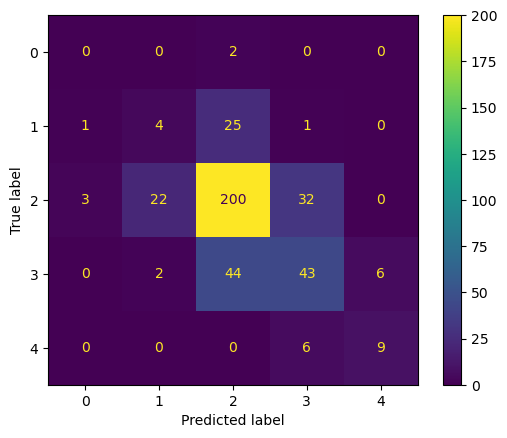

Decision Tree IG with max_depth = 11
Accuracy:  0.635
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.23      0.21      0.22        33
           2       0.76      0.74      0.75       265
           3       0.42      0.51      0.46        79
           4       0.80      0.60      0.69        20

    accuracy                           0.64       400
   macro avg       0.44      0.41      0.42       400
weighted avg       0.64      0.64      0.64       400





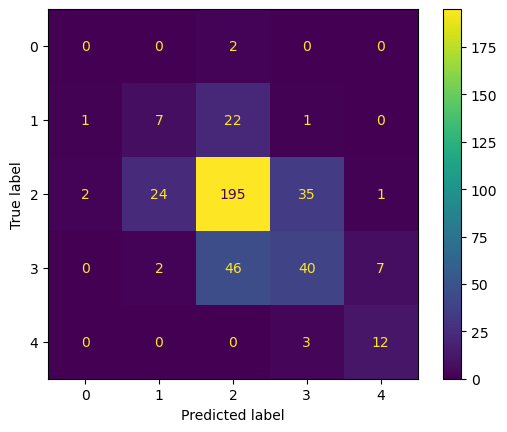

Decision Tree IG with max_depth = 12
Accuracy:  0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.23      0.24      0.23        29
           2       0.77      0.72      0.74       274
           3       0.41      0.50      0.45        78
           4       0.60      0.64      0.62        14

    accuracy                           0.63       400
   macro avg       0.40      0.42      0.41       400
weighted avg       0.64      0.63      0.63       400





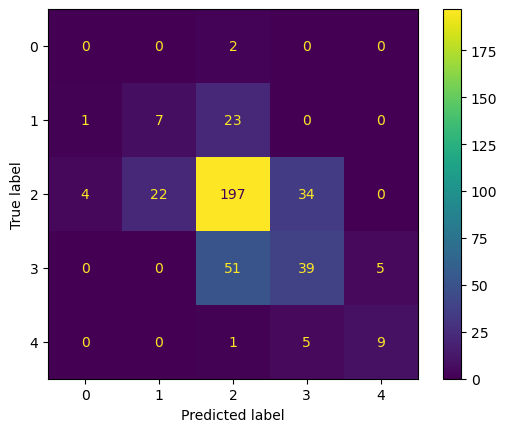

Decision Tree IG with max_depth = 13
Accuracy:  0.635
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.25      0.24        28
           2       0.75      0.73      0.74       264
           3       0.46      0.49      0.48        89
           4       0.67      0.67      0.67        15

    accuracy                           0.64       400
   macro avg       0.42      0.43      0.42       400
weighted avg       0.64      0.64      0.64       400





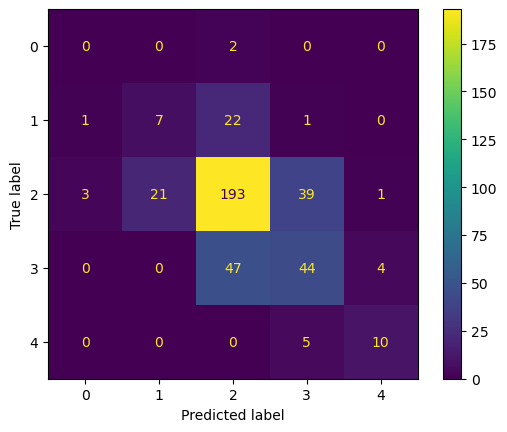

Decision Tree IG with max_depth = 14
Accuracy:  0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.23      0.23        30
           2       0.75      0.72      0.74       268
           3       0.43      0.48      0.45        86
           4       0.53      0.67      0.59        12

    accuracy                           0.62       400
   macro avg       0.39      0.42      0.40       400
weighted avg       0.63      0.62      0.63       400





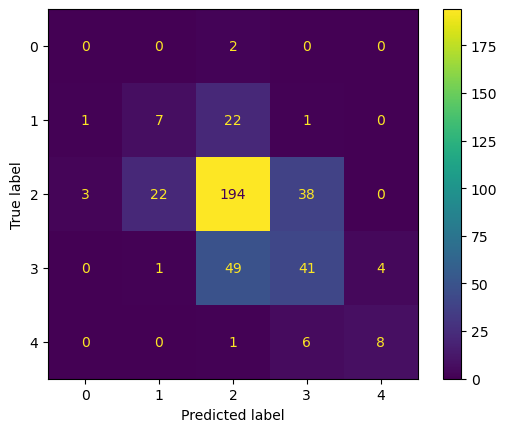

Decision Tree IG with max_depth = 15
Accuracy:  0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.23      0.23        31
           2       0.74      0.73      0.74       261
           3       0.46      0.49      0.48        89
           4       0.67      0.67      0.67        15

    accuracy                           0.63       400
   macro avg       0.42      0.42      0.42       400
weighted avg       0.63      0.63      0.63       400





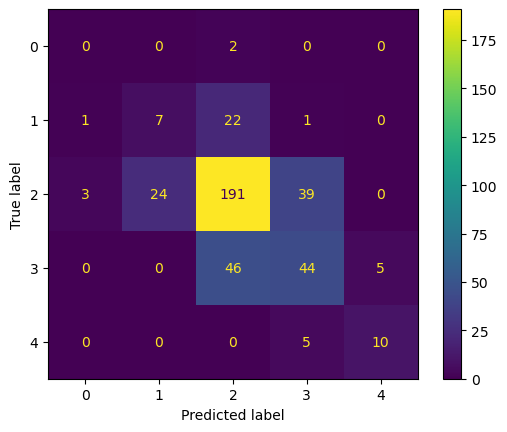

Decision Tree IG with max_depth = 16
Accuracy:  0.6225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.21      0.22        33
           2       0.73      0.73      0.73       259
           3       0.45      0.49      0.47        88
           4       0.73      0.69      0.71        16

    accuracy                           0.62       400
   macro avg       0.43      0.42      0.43       400
weighted avg       0.62      0.62      0.62       400





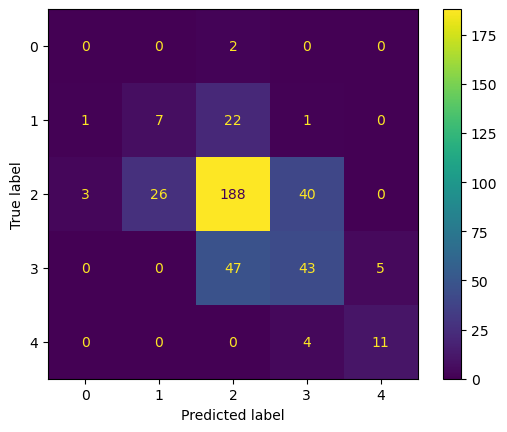

Decision Tree IG with max_depth = 17
Accuracy:  0.6225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.22      0.22        32
           2       0.74      0.73      0.73       261
           3       0.44      0.48      0.46        87
           4       0.67      0.62      0.65        16

    accuracy                           0.62       400
   macro avg       0.41      0.41      0.41       400
weighted avg       0.62      0.62      0.62       400





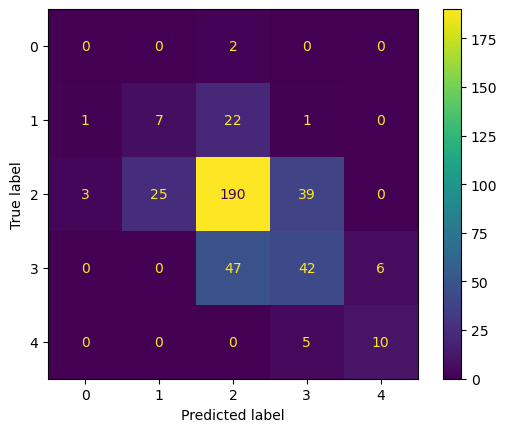

Decision Tree IG with max_depth = 18
Accuracy:  0.6225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.22      0.22        32
           2       0.74      0.73      0.74       260
           3       0.44      0.48      0.46        88
           4       0.67      0.62      0.65        16

    accuracy                           0.62       400
   macro avg       0.41      0.41      0.41       400
weighted avg       0.62      0.62      0.62       400





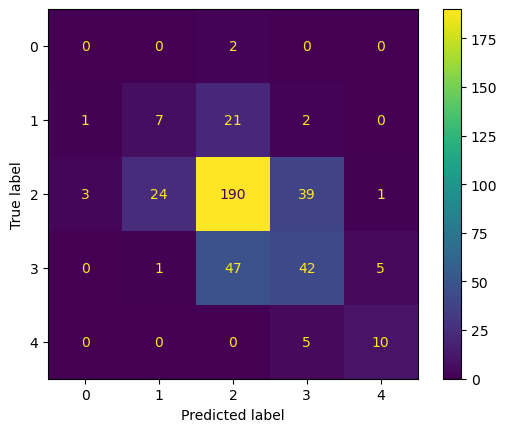

Decision Tree IG with max_depth = 19
Accuracy:  0.6225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.23      0.22      0.22        32
           2       0.74      0.73      0.74       260
           3       0.44      0.48      0.46        88
           4       0.67      0.62      0.65        16

    accuracy                           0.62       400
   macro avg       0.41      0.41      0.41       400
weighted avg       0.62      0.62      0.62       400





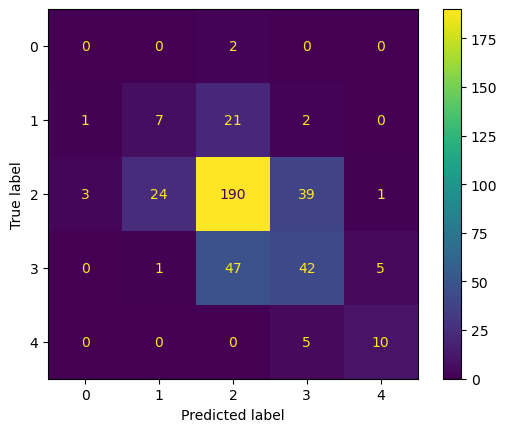

In [106]:
for n in list(range(10, 20, 1)):
    dt_IG = DecisionTreeClassifier(max_depth=n, criterion="entropy",  random_state=42)


    print(f"Decision Tree IG with max_depth = {n}")
    dt_IG.fit(OH_tree_X_sub_train, y_sub_train)
    print("Accuracy: ", dt_IG.score(X_validation, y_validation))
    
    y_pred_validation = dt_IG.predict(X_validation)
    print(classification_report(y_pred_validation, y_validation))
    print("\n")

    cm = confusion_matrix(y_validation, y_pred_validation, labels=dt_IG.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_IG.classes_)
    disp.plot()
    plt.show()

I chose n = 11 as it generalized well across labels and had a good scores in cross-validation.

              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.36      0.33      0.34        79
           2       0.74      0.82      0.78       595
           3       0.60      0.47      0.53       254
           4       0.73      0.70      0.71        50

    accuracy                           0.68       986
   macro avg       0.54      0.49      0.51       986
weighted avg       0.67      0.68      0.67       986



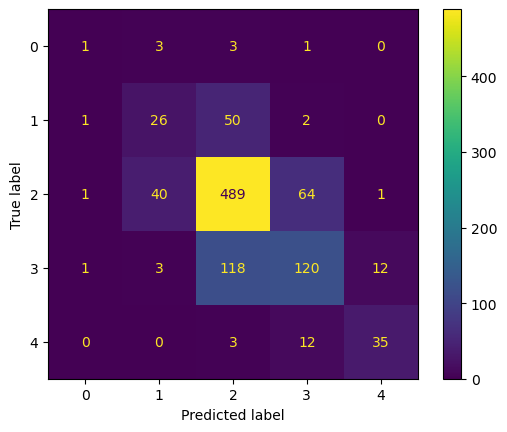

Top features for DT IG: Index(['num_voted_users', 'Drama', 'other_actors_facebook_likes', 'gross',
       'title_year', 'duration', 'director_facebook_likes',
       'ratio_user_critic_review', 'actor_1_facebook_likes',
       'movie_facebook_likes', 'is_english'],
      dtype='object')


In [107]:
dt_IG = DecisionTreeClassifier(max_depth=11, criterion="entropy",  random_state=42)
dt_IG.fit(OH_tree_X_train, y_train)
y_pred = dt_IG.predict(OH_tree_X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=dt_IG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_IG.classes_)
disp.plot()
plt.show()

# Get choosen features
importances_dt_IG = dt_IG.feature_importances_
indices_dt_IG = np.argsort(importances_dt_IG)[::-1] 
top_features_dt_IG = OH_tree_X_train.columns[indices_dt_IG][:11] 
print("Top features for DT IG:", top_features_dt_IG)

In [108]:
# Error data
error_data = OH_tree_X_test[y_test != y_pred][['num_voted_users', 'Drama', 'other_actors_facebook_likes', 
                                               'gross', 'title_year', 'duration', 'director_facebook_likes',
                                               'ratio_user_critic_review', 'actor_1_facebook_likes', 'movie_facebook_likes', 
                                               'is_english']]

y_pred_diff = pd.DataFrame({'id': OH_tree_X_test.index, 'y_pred': y_pred}).set_index('id').loc[error_data.index]
pd.concat([error_data, y_test[error_data.index], y_pred_diff], axis=1)


,num_voted_users,Drama,other_actors_facebook_likes,gross,title_year,duration,director_facebook_likes,ratio_user_critic_review,actor_1_facebook_likes,movie_facebook_likes,is_english,imdb_score_binned,y_pred
2694,79909,0,1020,43771291,2015,108,0,1.064516,1000,15000,1,3,2
701,75573,1,953,33685268,2003,136,759,0.264350,11000,4000,1,2,3
536,170684,1,614,124107476,2000,190,0,0.257209,599,0,1,3,2
711,47383,0,423,55762229,2001,84,42,0.568182,436,1000,1,1,2
601,116681,1,1563,143151473,2008,115,64,0.562500,2000,11000,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,18442,1,1121,3169424,2007,112,37,1.762712,748,689,1,2,1
1,78883,0,762,20433940,2005,97,0,0.380665,654,0,1,2,3
384,13190,0,1657,14114488,1988,98,17,0.578947,1000,616,1,1,2
1074,49934,0,962,60000000,1983,125,44,0.424107,593,0,1,1,3


In [109]:
training_ana_2 = OH_tree_X_train[(y_train == 2)][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
training_ana_3 = OH_tree_X_train[(y_train == 3) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
training_ana_4 = OH_tree_X_train[(y_train == 4) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
training_ana_0 = OH_tree_X_train[(y_train == 0) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
training_ana_1 = OH_tree_X_train[(y_train == 1) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]

test_ana_2 = OH_tree_X_test[(y_test == 2)][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
test_ana_3 = OH_tree_X_test[(y_test == 3) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
test_ana_4 = OH_tree_X_test[(y_test == 4) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
test_ana_0 = OH_tree_X_test[(y_test == 0) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]
test_ana_1 = OH_tree_X_test[(y_test == 1) ][['num_voted_users', 'Drama', 'other_actors_facebook_likes']]

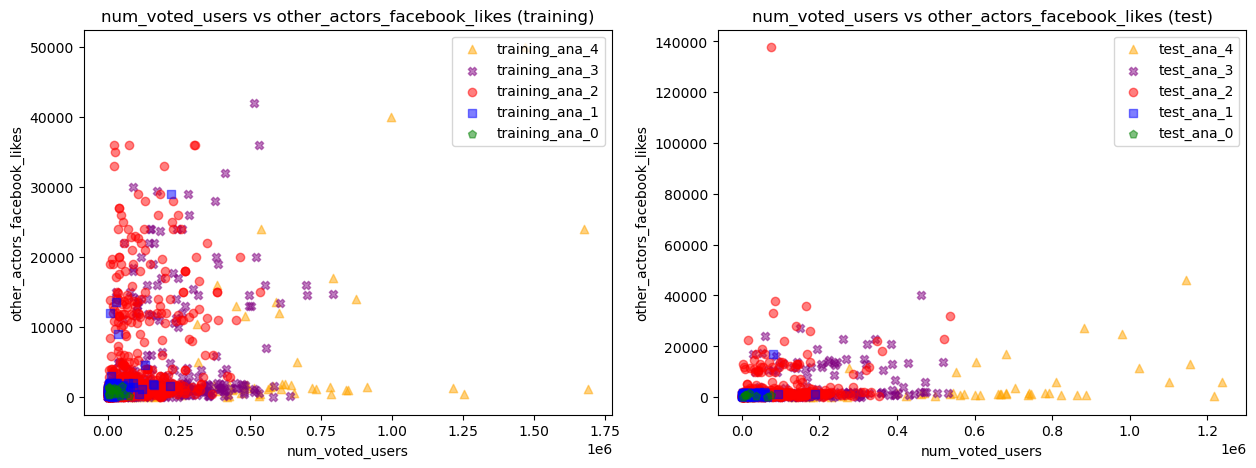

In [110]:
def plot_scatter(ax, dataframes, labels, colors, markers, alpha=0.5):
    for df, label, color, marker in zip(dataframes, labels, colors, markers):
        ax.scatter(df['num_voted_users'], df['other_actors_facebook_likes'], color=color, marker=marker, label=label, alpha=alpha)
    ax.legend()
    ax.set_xlabel('num_voted_users')
    ax.set_ylabel('other_actors_facebook_likes')

# Distribution of num_voted_users vs others_actors_facebook_likes in training dataset vs test dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training data
training_dataframes = [training_ana_4, training_ana_3, training_ana_2, training_ana_1, training_ana_0]
training_labels = ['training_ana_4', 'training_ana_3', 'training_ana_2', 'training_ana_1', 'training_ana_0']
colors = ['orange', 'purple', 'r', 'b', 'green']
markers = ['^', 'X', 'o', 's', 'p']

plot_scatter(ax1, training_dataframes, training_labels, colors, markers)
ax1.set_title('num_voted_users vs other_actors_facebook_likes (training)')

# Test data
test_dataframes = [test_ana_4, test_ana_3, test_ana_2, test_ana_1, test_ana_0]
test_labels = ['test_ana_4', 'test_ana_3', 'test_ana_2', 'test_ana_1', 'test_ana_0']

plot_scatter(ax2, test_dataframes, test_labels, colors, markers)
ax2.set_title('num_voted_users vs other_actors_facebook_likes (test)')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.show()

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- I have used two methods in evaluation: cv and holdout, they both produced higher scores than the previous model and ZeroR.

- Giving more data, the tree produced better recall and precision scores.

- The tree made a lot of mistakes in predicting label 1.

## Decision Tree with AdaBoosting

Decision Tree alone is often bad, however, with AdaBoosting Decision Tree can be more powerful. I won't consider addtional features anymore as they degraded decision tree performance.

Due to long run time, I can't choose high n_estimators.

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [10, 20],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 
               'recall': 'recall_macro', 
               'precision': 'precision_macro'
          }

dt_IG = DecisionTreeClassifier(max_depth=11, criterion="entropy", random_state=42)
clf  = AdaBoostClassifier(dt_IG, random_state=0)
grid_cv = GridSearchCV(clf, param, cv=5, scoring=scoring, refit='accuracy')
grid_cv.fit(OH_tree_X_train, y_train)

best_param_ada = grid_cv.best_params_
best_param_ada

{'learning_rate': 0.1, 'n_estimators': 20}

In [113]:
# Holdout evaluation on all training data
dt_IG = DecisionTreeClassifier(max_depth=11, criterion="entropy", random_state=42)
clf  = AdaBoostClassifier(dt_IG, n_estimators=best_param_ada['n_estimators'], learning_rate=best_param_ada['learning_rate'], random_state=0)
clf.fit(OH_tree_X_train, y_train)
y_pred = clf.predict(OH_tree_X_test)

print("Decision Tree with AdaBoosting with OneHot Encoding:")
print(classification_report(y_test, y_pred))


Decision Tree with AdaBoosting with OneHot Encoding:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.47      0.19      0.27        79
           2       0.73      0.88      0.80       595
           3       0.65      0.51      0.57       254
           4       0.89      0.66      0.76        50

    accuracy                           0.71       986
   macro avg       0.75      0.47      0.52       986
weighted avg       0.70      0.71      0.69       986



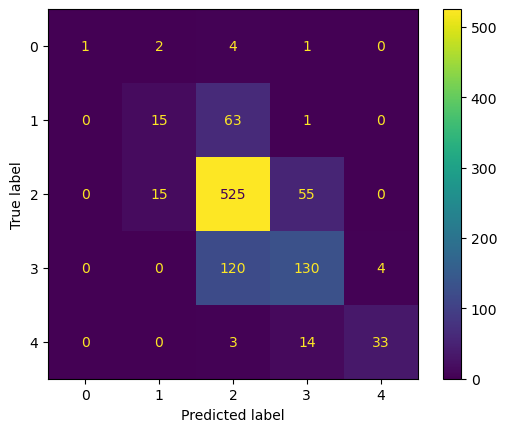

Top features for DT IG: Index(['num_voted_users', 'Drama', 'ratio_user_critic_review',
       'other_actors_facebook_likes', 'gross', 'title_year', 'duration',
       'bear', 'director_facebook_likes', 'average_degree_centrality',
       'actor_1_facebook_likes'],
      dtype='object')


In [114]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Get choosen features
importances_ada = clf.feature_importances_
indices_ada = np.argsort(importances_ada)[::-1] 
top_features_ada = OH_tree_X_train.columns[indices_ada][:11] 
print("Top features for DT IG:", top_features_ada)

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- Although it took a lot of time to run, the AdaBoost did help the tree to make more correct predition
- The recall and precision score is lower than Decision Tree.
- It predicted label 2 better, but it made more mistakes in other labels.

### Additional features


In [115]:
param = {
    'n_estimators': [10, 20],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 
               'recall': 'recall_macro', 
               'precision': 'precision_macro'}

dt_IG = DecisionTreeClassifier(max_depth=12, criterion="entropy", random_state=42)
clf  = AdaBoostClassifier(dt_IG, random_state=0)
grid_cv = GridSearchCV(clf, param, cv=5, scoring=scoring, refit='accuracy')
grid_cv.fit(OH_tree_X_train_a, y_train)

best_param = grid_cv.best_params_
best_param

{'learning_rate': 1.0, 'n_estimators': 20}

Decision Tree with AdaBoosting with OneHot Encoding:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        79
           2       0.64      0.95      0.76       595
           3       0.48      0.19      0.28       254
           4       1.00      0.06      0.11        50

    accuracy                           0.62       986
   macro avg       0.42      0.24      0.23       986
weighted avg       0.56      0.62      0.54       986



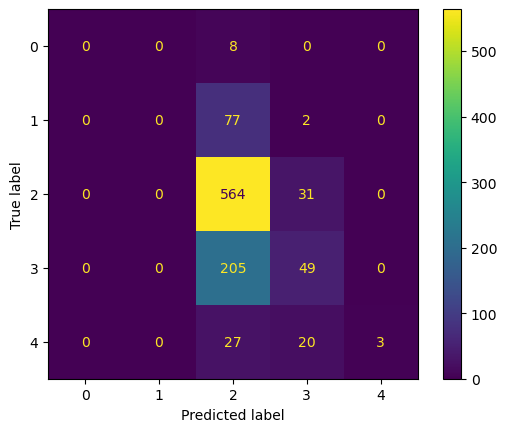

Top features for DT IG: Index(['num_voted_users', '221', 'duration', '202', '23', '132', '179', '211',
       '226', '284', '192', '204'],
      dtype='object')


In [116]:
# Holdout evaluation on all training data
dt_IG = DecisionTreeClassifier(max_depth=12, criterion="entropy", random_state=42)
clf  = AdaBoostClassifier(dt_IG, n_estimators=best_param['n_estimators'], learning_rate=best_param['learning_rate'], random_state=0)
clf.fit(OH_tree_X_train_a, y_train)
y_pred = clf.predict(OH_tree_X_test_a)

print("Decision Tree with AdaBoosting with OneHot Encoding:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Get choosen features
importances_ada = clf.feature_importances_
indices_ada = np.argsort(importances_ada)[::-1] 
top_features_ada = OH_tree_X_train_a.columns[indices_ada][:12] 
print("Top features for DT IG:", top_features_ada)

## Random Forest

I will also train the forest tree with two different ways to process data:
1. OneHot Encoding
2. Additional features

### OneHot Encoding

#### Hyperparameters

Since we need to optimize three hyperparameters: n_estimators, max_depth and max_features, I will use GridSearchCV. It combines hyperparameters and trains and evaluates the model using cross-validation. Therefore, it is better than looking at one hyperparameter separately.

Also, as the dataset is imbalance, higher accuracy can happen when the model just predict the second class correctly, so recall and precision gives more useful information.

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [10, 20, 50],
    'max_depth': [12, 14, 20],
    'max_features': ['sqrt', 'log2']
}

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 
               'recall': 'recall_macro', 
               'precision': 'precision_macro'}

rft = RandomForestClassifier(criterion="entropy", random_state=42)
grid_cv = GridSearchCV(rft, param, cv=5, scoring=scoring, refit='accuracy')
grid_cv.fit(OH_tree_X_train, y_train)

best_param_forest_one = grid_cv.best_params_
best_param_forest_one

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 10}

#### Train

In [118]:
# Cross evaluation
rft = RandomForestClassifier(criterion="entropy", n_estimators = best_param_forest_one['n_estimators'], max_depth=best_param_forest_one['max_depth'], max_features=best_param_forest_one['max_features'], random_state=42)
train_evaluate_model(rft, OH_tree_X_train, y_train, 5)

Average scores (5-fold cross-validation):
Accuracy: 0.6285
[0.6325 0.6275 0.6325 0.625  0.625 ]
Recall (macro-averaged): 0.2092005031248772
[0.21153846 0.20776699 0.21391455 0.20582524 0.20695727]
Precision (macro-averaged): 0.26705352167926993
[0.27602041 0.25871404 0.24122872 0.27474747 0.28455696]
Time: 2.5789308547973633




In [119]:
rft = RandomForestClassifier(criterion="entropy", n_estimators = best_param_forest_one['n_estimators'], max_depth=best_param_forest_one['max_depth'], max_features=best_param_forest_one['max_features'], random_state=42)
rft.fit(OH_tree_X_train, y_train)
y_pred = rft.predict(OH_tree_X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        79
           2       0.62      1.00      0.76       595
           3       0.38      0.03      0.06       254
           4       0.00      0.00      0.00        50

    accuracy                           0.61       986
   macro avg       0.20      0.21      0.16       986
weighted avg       0.47      0.61      0.47       986



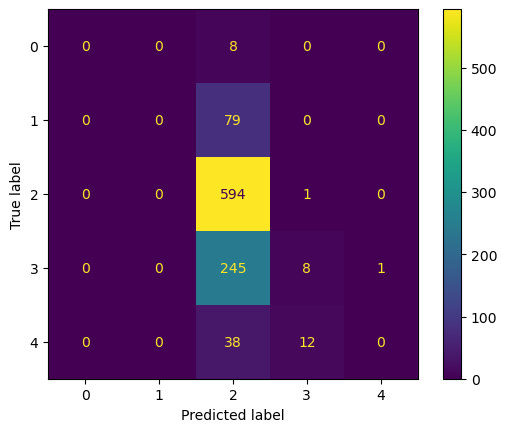

Top features for DT IG: Index(['num_voted_users', 'duration', 'movie_facebook_likes', 'gross',
       'ratio_user_critic_review', 'average_degree_centrality',
       'facenumber_in_poster', 'title_year', '7153', 'Comedy'],
      dtype='object')


In [120]:
cm = confusion_matrix(y_test, y_pred, labels=rft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rft.classes_)
disp.plot()
plt.show()

# Get choosen features
importances_forest = rft.feature_importances_
indices_forest = np.argsort(importances_forest)[::-1] 
top_features_forest = OH_tree_X_train.columns[indices_forest][:10] 
print("Top features for DT IG:", top_features_forest)

Rerun the Random Forest with manually chosen hyperparameters

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      0.03      0.05        79
           2       0.66      0.98      0.79       595
           3       0.59      0.23      0.33       254
           4       1.00      0.10      0.18        50

    accuracy                           0.66       986
   macro avg       0.58      0.27      0.27       986
weighted avg       0.66      0.66      0.58       986



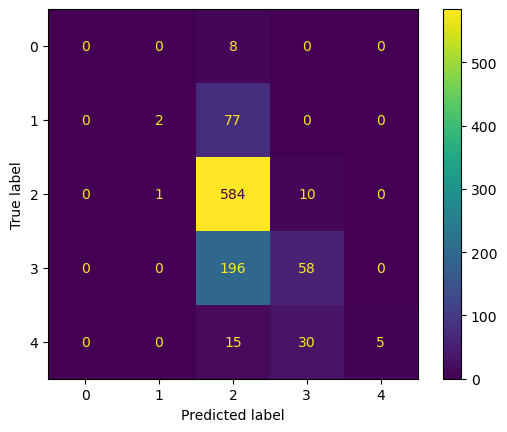

In [121]:
rft = RandomForestClassifier(criterion="entropy", n_estimators = 10, max_depth=None, random_state=42)
rft.fit(OH_tree_X_train, y_train)
y_pred = rft.predict(OH_tree_X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=rft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rft.classes_)
disp.plot()
plt.show()

### Advanced features

In [122]:
param = {
    'n_estimators': [10, 20, 50],
    'max_depth': [12, 14, 20],
    'max_features': ['sqrt', 'log2']
}

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 
               'recall': 'recall_macro', 
               'precision': 'precision_macro'}

rft = RandomForestClassifier(criterion="entropy", random_state=42)
grid_cv = GridSearchCV(rft, param, cv=5, scoring=scoring, refit='accuracy')
grid_cv.fit(OH_tree_X_train_a, y_train)

best_param_forest = grid_cv.best_params_
best_param_forest

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}

In [123]:
# Cross evaluation
rft = RandomForestClassifier(criterion="entropy", n_estimators = best_param_forest['n_estimators'], max_depth=best_param_forest['max_depth'], max_features=best_param_forest['max_features'], random_state=42)
train_evaluate_model(rft, OH_tree_X_train_a, y_train, 5)

Average scores (5-fold cross-validation):
Accuracy: 0.6345
[0.6375 0.625  0.635  0.635  0.64  ]
Recall (macro-averaged): 0.2192720411933493
[0.21983806 0.21261743 0.22378051 0.21698833 0.22313588]
Precision (macro-averaged): 0.25286611666160097
[0.26055846 0.23802083 0.25034965 0.26008658 0.25531506]
Time: 7.309344291687012




In [124]:
rft.fit(OH_tree_X_train_a, y_train)
y_pred = rft.predict(OH_tree_X_test_a)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        79
           2       0.62      0.98      0.76       595
           3       0.57      0.10      0.17       254
           4       0.00      0.00      0.00        50

    accuracy                           0.62       986
   macro avg       0.24      0.22      0.19       986
weighted avg       0.52      0.62      0.50       986



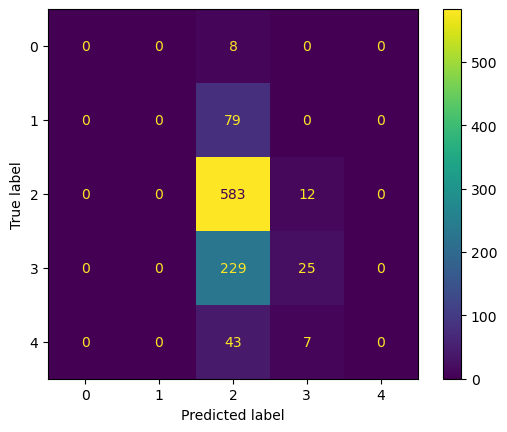

Top features for DT IG: Index(['num_voted_users', 'movie_facebook_likes', 'duration', 'gross', '166',
       'director_facebook_likes', 'ratio_user_critic_review', '114', '127',
       '180', '305', 'title_year', '184', '162', '208'],
      dtype='object')


In [125]:
cm = confusion_matrix(y_test, y_pred, labels=rft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rft.classes_)
disp.plot()
plt.show()

# Get choosen features
importances_forest = rft.feature_importances_
indices_forest = np.argsort(importances_forest)[::-1] 
top_features_forest = OH_tree_X_train_a.columns[indices_forest][:15] 
print("Top features for DT IG:", top_features_forest)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        79
           2       0.63      0.99      0.77       595
           3       0.66      0.11      0.19       254
           4       0.00      0.00      0.00        50

    accuracy                           0.63       986
   macro avg       0.26      0.22      0.19       986
weighted avg       0.55      0.63      0.51       986



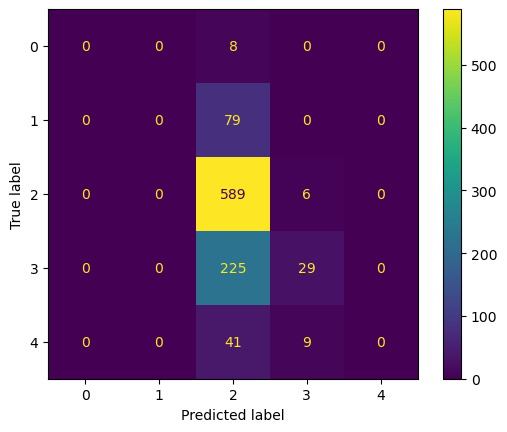

In [126]:
rft = RandomForestClassifier(criterion="entropy", n_estimators = 50, max_depth=None, random_state=42)
rft.fit(OH_tree_X_train_a, y_train)
y_pred = rft.predict(OH_tree_X_test_a)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=rft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rft.classes_)
disp.plot()
plt.show()

<p style="color:green; font-size:20px;"><strong>DISCUSSION</strong></p>

- It is just bad.

# Final Prediction

After exploring three models: ZeroR, Decision Tree, Decision Tree with AdaBoost, Random Forest. The Decision Tree with AdaBoost performed the best.

The Boosting method helped the Decision Tree to focus on instances which the tree predicted incorrectly in previous iteration, which also addressed the imbalance issue.

Clearly, Doc2Vec, CountVec, and FastText features doens't work well with Decision Tree.

In [127]:
unseen_data = pd.read_csv("project_data/test_dataset.csv")
id_col = unseen_data['id']
unseen_data = unseen_data.drop('id', axis=1)
unseen_data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
0,Angelo Pizzo,27,118,14,400,Finn Wittrock,2000,2246000,Biography|Drama|Sport,Donny Boaz,...,coach|football|football movie|football team|hi...,20,English,USA,PG,2015,769,0,[-1.8731274e-03 7.4580857e-05 -1.0176800e-03 ...,0.000375
1,Oliver Stone,339,141,0,404,Shea Whigham,749,47307550,Crime|Drama|Thriller,Demián Bichir,...,arms tied overhead|damsel in distress|dea|mari...,269,English,USA,R,2012,463,28000,[-9.12924181e-04 -1.82617712e-03 -7.91343977e-...,0.002176
2,Peter Stebbings,78,95,89,388,Tony Nappo,963,37606,Comedy|Crime|Drama,Michael Kelly,...,gun running|organized crime|pimp|superhero|vig...,90,English,Canada,R,2009,654,0,[-2.2053068e-04 -8.8869774e-04 1.3940284e-04 ...,0.000900
3,Sam Mendes,226,117,0,818,Jennifer Jason Leigh,15000,104054514,Crime|Drama|Thriller,Tom Hanks,...,1930s|blood|gun|on the run|revenge,1009,English,USA,R,2002,1000,0,[-7.79978640e-04 1.89176446e-03 1.27516838e-...,0.003452
4,Maggie Carey,97,104,38,690,Alia Shawkat,801,3447339,Comedy|Romance,Donald Glover,...,feces in a swimming pool|female vomiting|high ...,79,English,USA,R,2013,727,0,[-2.7749534e-03 4.2528817e-03 3.0464510e-04 ...,0.000450


Process unseen dataset with the same steps applied to train dataset.

In [128]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              752 non-null    object 
 1   num_critic_for_reviews     752 non-null    int64  
 2   duration                   752 non-null    int64  
 3   director_facebook_likes    752 non-null    int64  
 4   actor_3_facebook_likes     752 non-null    int64  
 5   actor_2_name               752 non-null    object 
 6   actor_1_facebook_likes     752 non-null    int64  
 7   gross                      752 non-null    int64  
 8   genres                     752 non-null    object 
 9   actor_1_name               752 non-null    object 
 10  movie_title                752 non-null    object 
 11  num_voted_users            752 non-null    int64  
 12  cast_total_facebook_likes  752 non-null    int64  
 13  actor_3_name               752 non-null    object 

In [129]:
def feature_engineering(df):
    # Create new features
    df.loc[:, 'content_rating'] = df['content_rating'].map(change_rating)
    df.loc[:, 'country'] = df['country'].map(country_processing)
    df.loc[:, 'is_english'] = df['language'].map(language_processing)
    df = df.drop(['language', 'title_embedding'], axis=1)

    # Transform facebook likes 
    df['other_actors_facebook_likes'] = df['actor_3_facebook_likes'].copy() + df['actor_2_facebook_likes'].copy()
    df = df.drop(['cast_total_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes'], axis=1)

    # Create ratio feature between critic review and user
    df['ratio_user_critic_review'] = df['num_critic_for_reviews'] / df['num_user_for_reviews']
    df = df.drop(['num_critic_for_reviews', 'num_user_for_reviews'], axis=1)
    
    df = genre_preprocess(df) # use dictionary of distinct values created from train_dataset
    df = plot_keywords_preprocess(df) # use dictionary of distinct values created from train_dataset
    
    return df

In [130]:
# Preprocessed data

# Value of genres or plot_keywords not existing in train_dataset will be ignored
processed_unseen_data = feature_engineering(unseen_data) 
processed_X = feature_engineering(X) 

C:\Users\admin\AppData\Local\Temp\ipykernel_22180\2798655884.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_genres.keys()] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_22180\3125418963.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dict_keywords.keys()] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_22180\2798655884.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either

In [131]:
np.shape(processed_unseen_data.head())[1] == np.shape(processed_X.head())[1]

True

In [132]:
# Train with all available train_dataset
categorical_encode = [x for x in processed_X.columns if processed_X[x].dtype == 'object']
remain_cols = [x for x in processed_X.columns if processed_X[x].dtype != 'object']

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(processed_X[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(processed_X[categorical_encode]))
OH_test = pd.DataFrame(OH_Encode.transform(processed_unseen_data[categorical_encode]))

# Put index back
OH_train.index = processed_X.index
OH_test.index = processed_unseen_data.index

# Merge the onehot data with the rest
OH_X_train = pd.concat([OH_train, processed_X[remain_cols]], axis=1)
OH_X_test = pd.concat([OH_test, processed_unseen_data[remain_cols]], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype("str")
OH_X_test.columns = OH_X_test.columns.astype("str")

In [133]:
# Train and predict using AdaBoost
dt_IG = DecisionTreeClassifier(max_depth=11, criterion="entropy", random_state=42)
clf  = AdaBoostClassifier(dt_IG, n_estimators=best_param_ada['n_estimators'], learning_rate=best_param_ada['learning_rate'], random_state=0)

clf.fit(OH_X_train, y)
y_pred = clf.predict(OH_X_test)

In [134]:
# Create a DataFrame
data = {'id': id_col, 'imdb_score_binned': y_pred}
result = pd.DataFrame(data)

# Write DataFrame to CSV file
result.to_csv('outputAdaBoost.csv', index=False)

In [137]:
# Train and predict using Decision Tree
dt_IG = DecisionTreeClassifier(max_depth=11, criterion="entropy", random_state=42)

dt_IG.fit(OH_X_train, y)
y_pred = clf.predict(OH_X_test)

# Create a DataFrame
data = {'id': id_col, 'imdb_score_binned': y_pred}
result = pd.DataFrame(data)

# Write DataFrame to CSV file
result.to_csv('outputDecisionTree.csv', index=False)

In [138]:
# Train and predict using Random Forest
clf  = RandomForestClassifier(criterion="entropy", n_estimators = 10, max_depth=None, random_state=42)

clf.fit(OH_X_train, y)
y_pred = clf.predict(OH_X_test)

# Create a DataFrame
data = {'id': id_col, 'imdb_score_binned': y_pred}
result = pd.DataFrame(data)

# Write DataFrame to CSV file
result.to_csv('outputRandomF.csv', index=False)